In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('drive/MyDrive/london_df.csv')
data

Unnamed: 0    month  ... stringency  covid
0                 0  2018-01  ...      0.000      0
1                 1  2018-01  ...      0.000      0
2                 2  2018-01  ...      0.000      0
3                 3  2018-01  ...      0.000      0
4                 4  2018-01  ...      0.000      0
...             ...      ...  ...        ...    ...
2844236     2844236  2021-09  ...     42.034      1
2844237     2844237  2021-09  ...     42.034      1
2844238     2844238  2021-09  ...     42.034      1
2844239     2844239  2021-09  ...     42.034      1
2844240     2844240  2021-09  ...     42.034      1

[2844241 rows x 13 columns]

In [ ]:
data['crime type'].unique()

array(['Burglary', 'Criminal damage and arson', 'Other theft',
       'Vehicle crime', 'Violence and sexual offences', 'Other crime',
       'Drugs', 'Robbery', 'Shoplifting', 'Public order', 'Bicycle theft',
       'Theft from the person', 'Possession of weapons'], dtype=object)

In [4]:
#one hot encoding crime type columns
crime_stringency = data[['month', 'crime type', 'stringency', 'covid']].copy()

In [5]:
data_encoded = pd.get_dummies(crime_stringency, columns = ['crime type'])
data_encoded

month  ...  crime type_Violence and sexual offences
0        2018-01  ...                                        0
1        2018-01  ...                                        0
2        2018-01  ...                                        0
3        2018-01  ...                                        0
4        2018-01  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2844241 rows x 16 columns]

In [7]:
columns_encoded = data_encoded.columns.to_list()[3:]
columns_encoded

['crime type_Bicycle theft',
 'crime type_Burglary',
 'crime type_Criminal damage and arson',
 'crime type_Drugs',
 'crime type_Other crime',
 'crime type_Other theft',
 'crime type_Possession of weapons',
 'crime type_Public order',
 'crime type_Robbery',
 'crime type_Shoplifting',
 'crime type_Theft from the person',
 'crime type_Vehicle crime',
 'crime type_Violence and sexual offences']

In [8]:
for value in columns_encoded:
    print(data_encoded[value].value_counts())

0    2766362
1      77879
Name: crime type_Bicycle theft, dtype: int64
0    2587295
1     256946
Name: crime type_Burglary, dtype: int64
0    2649840
1     194401
Name: crime type_Criminal damage and arson, dtype: int64
0    2687933
1     156308
Name: crime type_Drugs, dtype: int64
0    2810195
1      34046
Name: crime type_Other crime, dtype: int64
0    2464934
1     379307
Name: crime type_Other theft, dtype: int64
0    2824963
1      19278
Name: crime type_Possession of weapons, dtype: int64
0    2668225
1     176016
Name: crime type_Public order, dtype: int64
0    2739613
1     104628
Name: crime type_Robbery, dtype: int64
0    2700904
1     143337
Name: crime type_Shoplifting, dtype: int64
0    2695171
1     149070
Name: crime type_Theft from the person, dtype: int64
0    2439840
1     404401
Name: crime type_Vehicle crime, dtype: int64
0    2095617
1     748624
Name: crime type_Violence and sexual offences, dtype: int64


In [9]:
#removing spaces from column names as sometimes some methods don't accept them
new_columns = []

for column in columns_encoded:
  col = "_".join(column.split())
  new_columns.append(col)
new_columns

['crime_type_Bicycle_theft',
 'crime_type_Burglary',
 'crime_type_Criminal_damage_and_arson',
 'crime_type_Drugs',
 'crime_type_Other_crime',
 'crime_type_Other_theft',
 'crime_type_Possession_of_weapons',
 'crime_type_Public_order',
 'crime_type_Robbery',
 'crime_type_Shoplifting',
 'crime_type_Theft_from_the_person',
 'crime_type_Vehicle_crime',
 'crime_type_Violence_and_sexual_offences']

In [10]:
old_cols = columns_encoded
rename_cols = zip(old_cols, new_columns)
col_dict = dict(list(rename_cols))

In [11]:
data_encoded.rename(columns = col_dict, inplace=True )
data_encoded

month  ...  crime_type_Violence_and_sexual_offences
0        2018-01  ...                                        0
1        2018-01  ...                                        0
2        2018-01  ...                                        0
3        2018-01  ...                                        0
4        2018-01  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2844241 rows x 16 columns]

#comparing the number of crimes by type before and during pandemic

In [12]:
#Getting equal number of dates before and during pandemic
data_encoded['month'].unique().tolist().index('2018-08')

7

In [13]:
dates_balanced = data_encoded['month'].unique().tolist()[7:]

In [14]:
def in_dates(item):
    if item in dates_balanced:
        return True
    else: return False

In [15]:
df_balanced = data_encoded[data['month'].apply(in_dates)]
df_balanced

month  ...  crime_type_Violence_and_sexual_offences
9781     2018-08  ...                                        0
9782     2018-08  ...                                        0
9783     2018-08  ...                                        0
9784     2018-08  ...                                        0
9785     2018-08  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2395166 rows x 16 columns]

In [16]:
df_balanced['month'].unique()

array(['2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
       '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
       '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
       '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09'], dtype=object)

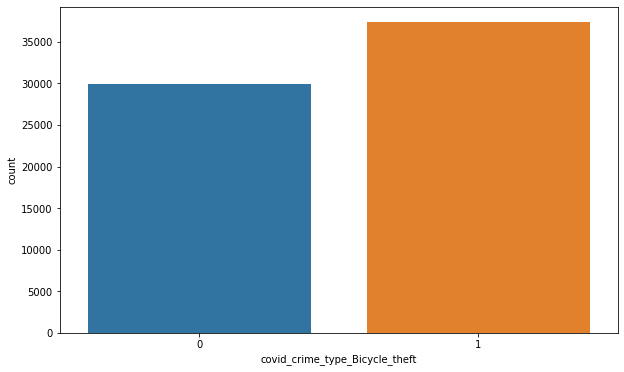

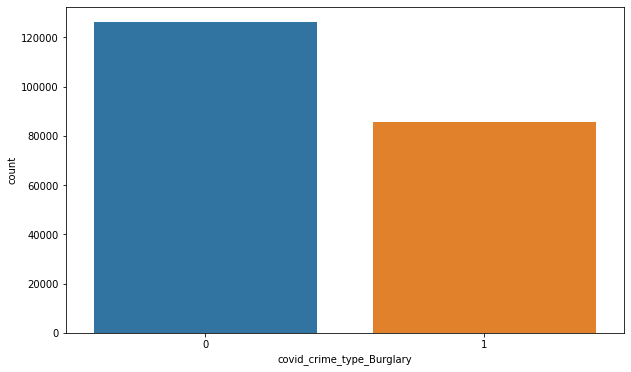

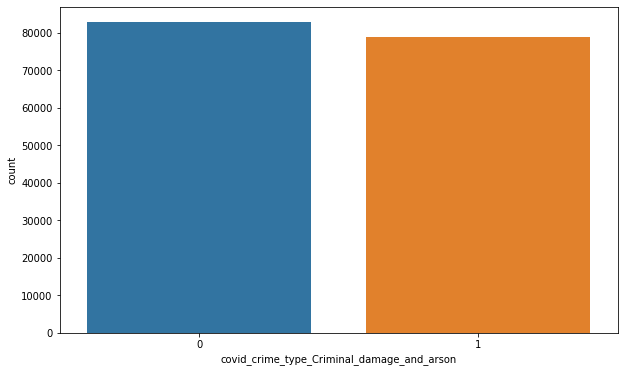

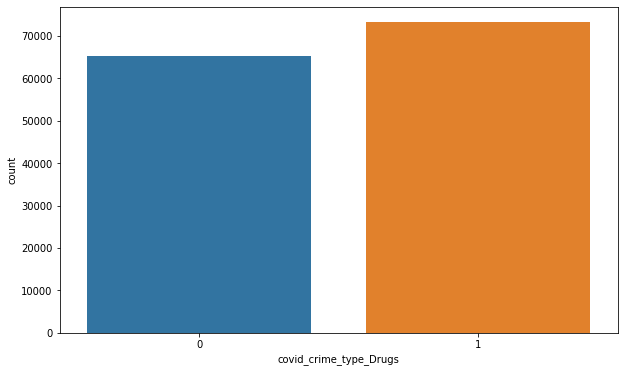

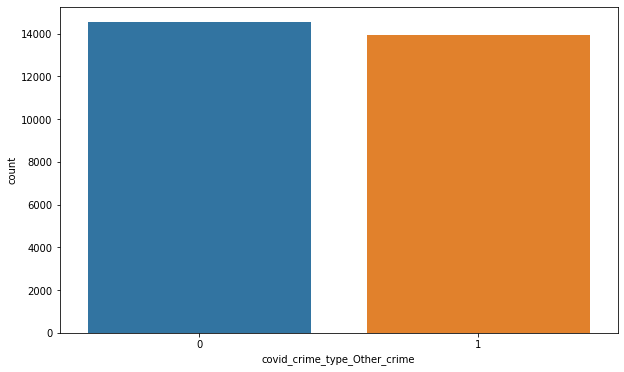

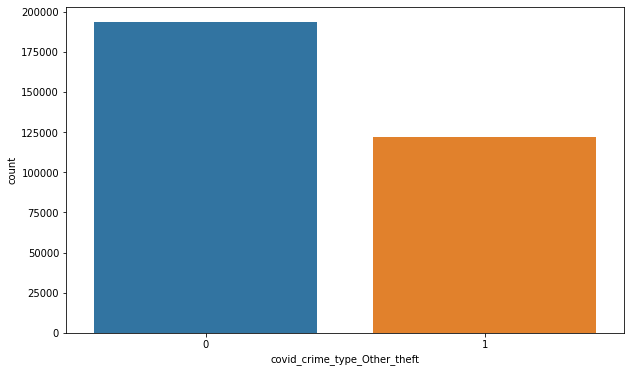

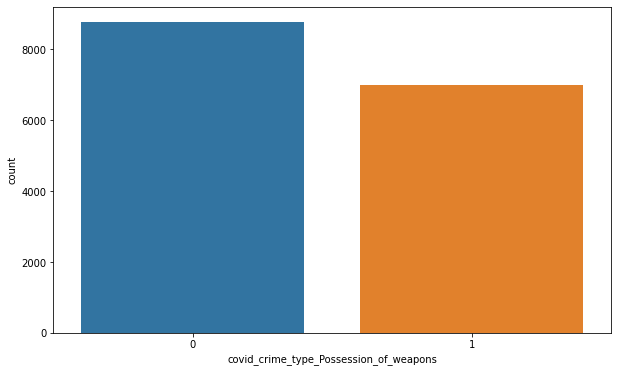

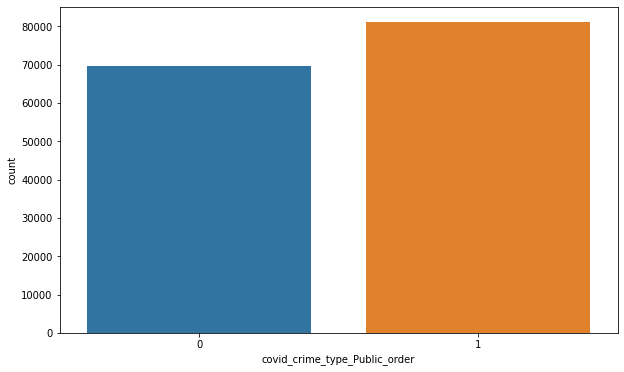

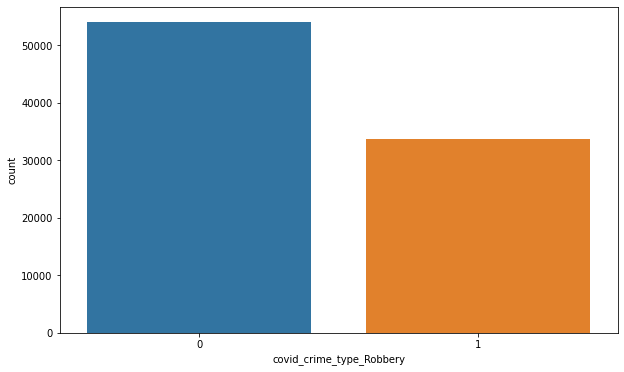

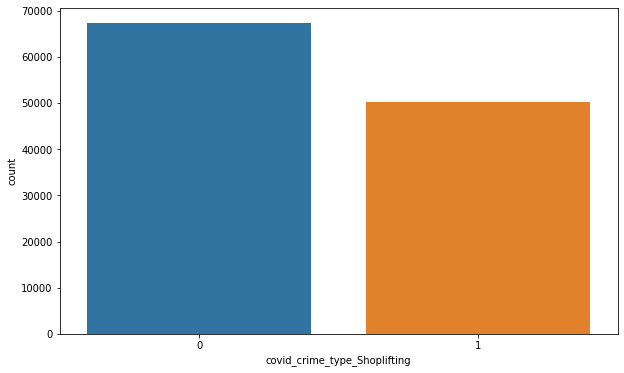

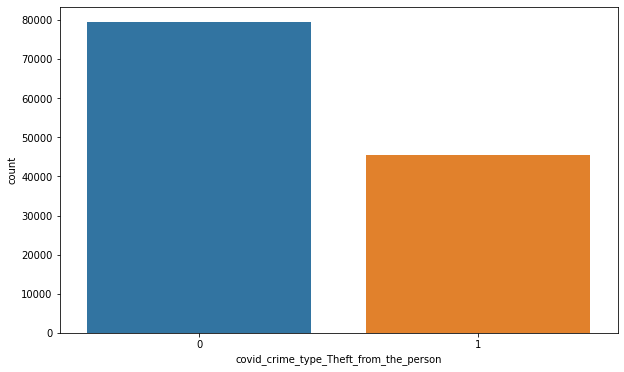

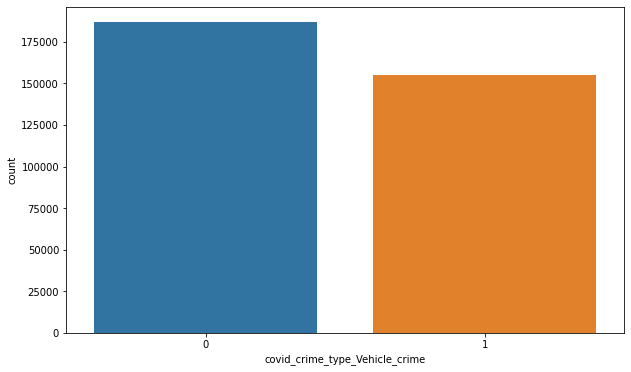

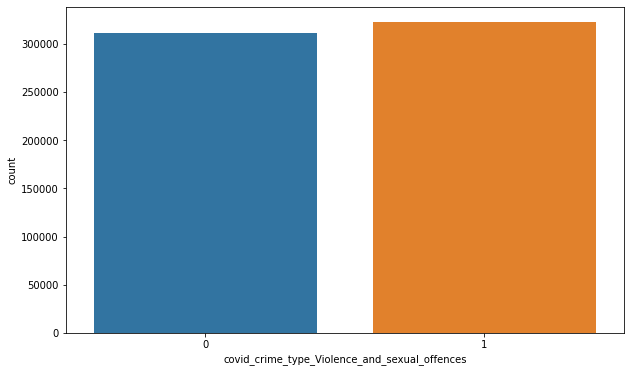

In [ ]:
#comparing the number of crimes by type before and during pandemic
for col in new_columns:
  feature = df_balanced[df_balanced[f'{col}'] == 1][['covid', f'{col}']]
  plt.figure(figsize = (10, 6))
  # ax = sns.distplot(feature['stringency'])
  ax = sns.countplot(x = feature['covid'])
  ax.set(xlabel = f'covid_{col}')

In [ ]:
print(feature)

         covid  crime_type_Violence_and_sexual_offences
9793         0                                        1
9794         0                                        1
9795         0                                        1
9796         0                                        1
9797         0                                        1
...        ...                                      ...
2844227      1                                        1
2844228      1                                        1
2844238      1                                        1
2844239      1                                        1
2844240      1                                        1

[633456 rows x 2 columns]


#pllotting the distribution of total crime over stringency

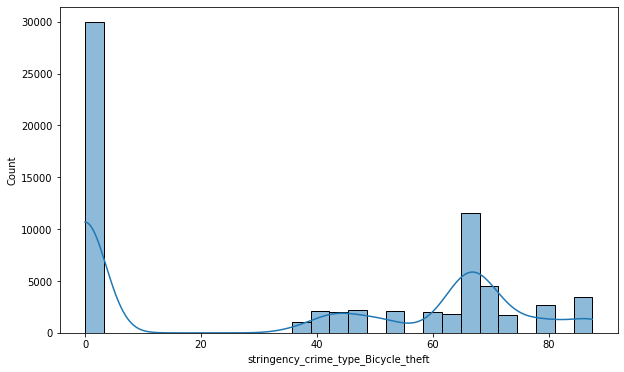

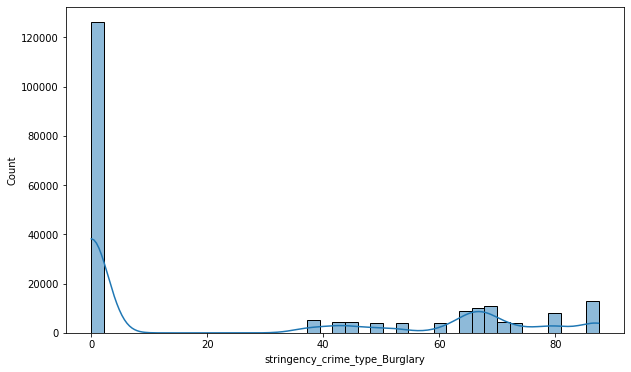

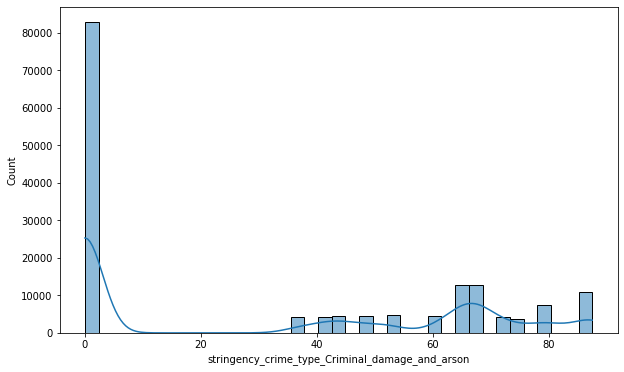

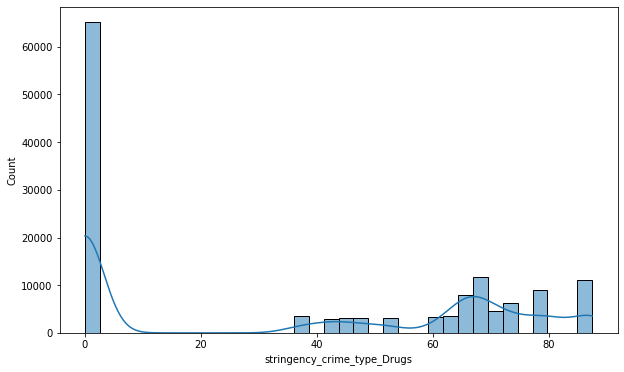

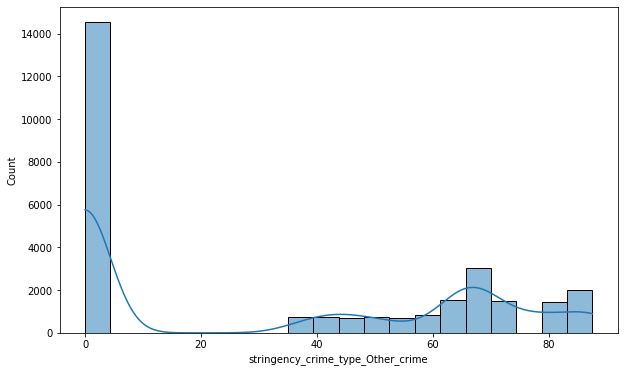

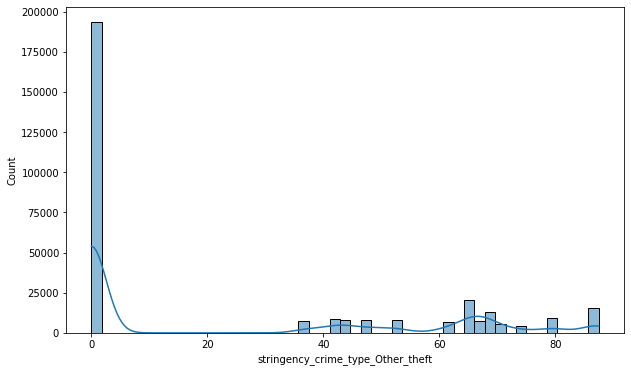

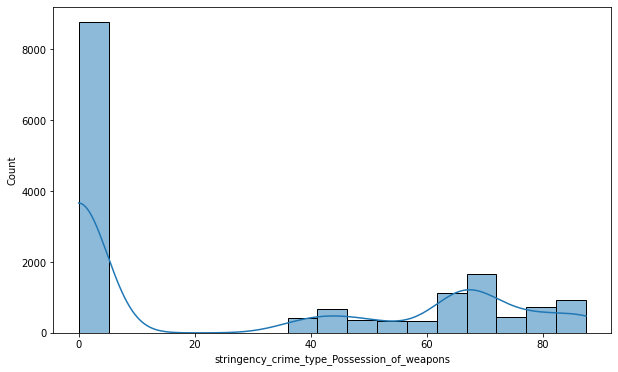

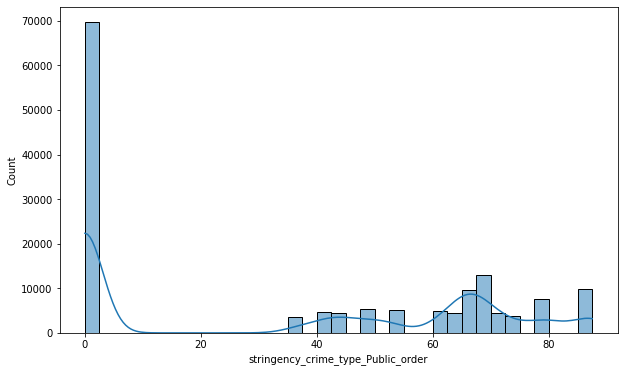

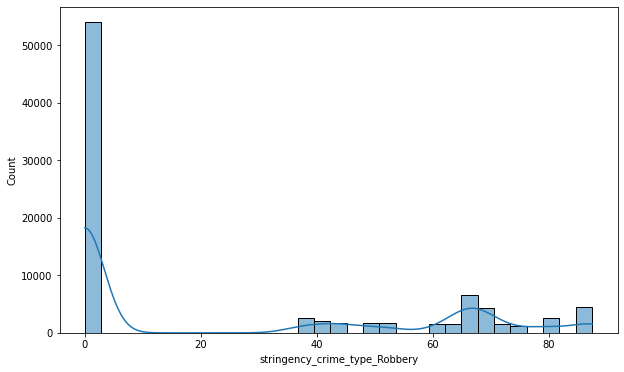

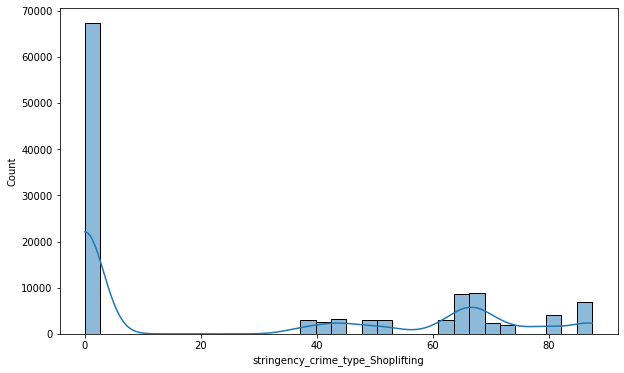

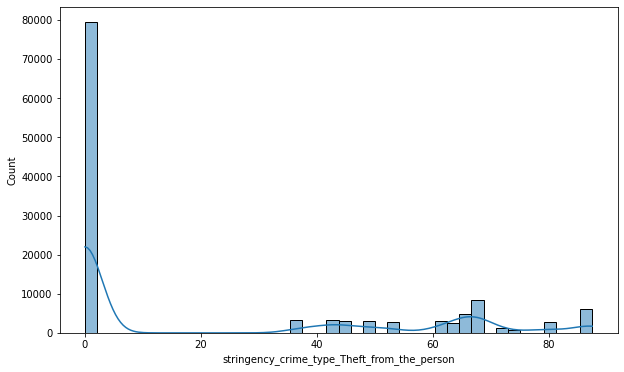

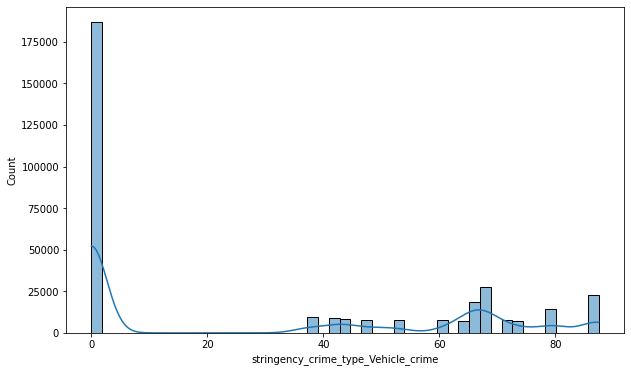

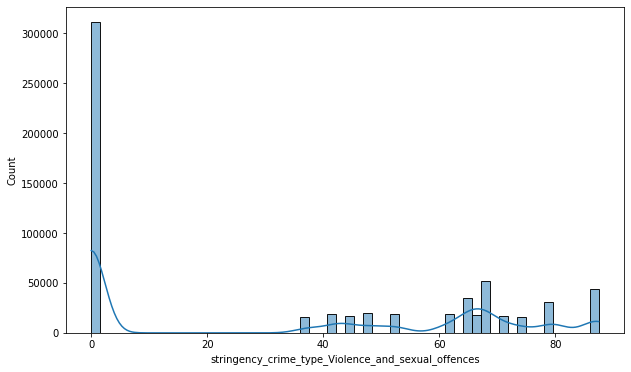

In [ ]:
#pllotting the distribution of total crime over stringency
for col in new_columns:
  feature = df_balanced[df_balanced[f'{col}'] == 1][['stringency', f'{col}']]
  plt.figure(figsize = (10, 6))
  # ax = sns.distplot(feature['stringency'])
  ax = sns.histplot(feature['stringency'], kde=True)
  ax.set(xlabel = f'stringency_{col}')
  
  #Based on the frequency distrbution of crimes by stringency, we can see that stringency 0 dominates the stringency values. 
  #We will analyze the data with stringency as a binary variable (pre- vs pandemic)

#Logistic regression predicting binarized stringency (covid variable) from crime counts per month

In [ ]:
#Logistic regression predicting binarized stringency (covid variable) from crime counts per month

In [72]:
target_covid = data_encoded.groupby('month')['covid'].mean()
features_covid = data_encoded.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()

In [73]:
features_covid

crime_type_Bicycle_theft  ...  crime_type_Violence_and_sexual_offences
month                              ...                                         
2018-01                    1154.0  ...                                  15663.0
2018-02                    1023.0  ...                                  14212.0
2018-03                    1025.0  ...                                  16340.0
2018-04                    1344.0  ...                                  15480.0
2018-05                    1803.0  ...                                  17366.0
2018-06                    1905.0  ...                                  17411.0
2018-07                    2331.0  ...                                  18696.0
2018-08                    2096.0  ...                                  16047.0
2018-09                    2203.0  ...                                  16228.0
2018-10                    2168.0  ...                                  16742.0
2018-11                    1539.0  ...                                  16331.0
2018-12                    1080.0  ...                                  16188.0
2019-01                    1266.0  ...                                  15933.0
2019-02                    1199.0  ...                                  15250.0
2019-03                    1470.0  ...                                  17172.0
2019-04                    1632.0  ...                                  15767.0
2019-05                    1915.0  ...                                  17021.0
2019-06                    1926.0  ...                                  17313.0
2019-07                    2058.0  ...                                  18111.0
2019-08                    1730.0  ...                                  16077.0
2019-09                    1623.0  ...                                  16357.0
2019-10                    1605.0  ...                                  16638.0
2019-11                    1249.0  ...                                  16392.0
2019-12                     942.0  ...                                  15857.0
2020-01                    1187.0  ...                                  16156.0
2020-02                    1063.0  ...                                  15602.0
2020-03                    1086.0  ...                                  16134.0
2020-04                    1055.0  ...                                  13714.0
2020-05                    1756.0  ...                                  15778.0
2020-06                    2544.0  ...                                  16879.0
2020-07                    2817.0  ...                                  18222.0
2020-08                    3041.0  ...                                  18381.0
2020-09                    3086.0  ...                                  17585.0
2020-10                    2638.0  ...                                  16891.0
2020-11                    2016.0  ...                                  16435.0
2020-12                    1310.0  ...                                  15551.0
2021-01                    1047.0  ...                                  14150.0
2021-02                    1102.0  ...                                  14080.0
2021-03                    1602.0  ...                                  17425.0
2021-04                    1820.0  ...                                  16842.0
2021-05                    2031.0  ...                                  19080.0
2021-06                    2075.0  ...                                  19359.0
2021-07                    2180.0  ...                                  19729.0
2021-08                    1980.0  ...                                  17282.0
2021-09                    2157.0  ...                                  18757.0

[45 rows x 13 columns]

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_covid, target_covid, test_size = 0.2, random_state=5)

##Analyzing feature importance for crime types monthly count when target variable is covid (binarized stringency)

In [77]:
#Analyzing feature importance for crime types monthly count when target variable is covid (binarized stringency)
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest


In [85]:
y_cov =  y_train.values
X_cov = X_train.values
print(X_cov)
print(y_cov)

[[ 1187.  6849.  4266.  4213.   768.  9473.   496.  3615.  3007.  3780.
   4240. 11814. 16156.]
 [ 1905.  6043.  4708.  2383.   788.  9095.   513.  3839.  2577.  3633.
   3604.  8894. 17411.]
 [ 1154.  7548.  4797.  2828.   836.  8897.   518.  3130.  2586.  3826.
   3557.  9339. 15663.]
 [ 2544.  4261.  4246.  4560.   769.  5312.   394.  4468.  1550.  2358.
   1183.  8002. 16879.]
 [ 1025.  6306.  4501.  2495.   831.  8814.   505.  3553.  2331.  3674.
   3597.  8845. 16340.]
 [  942.  6568.  4112.  3111.   721.  9824.   411.  3521.  2948.  3349.
   4347. 10208. 15857.]
 [ 1980.  4272.  4395.  3099.   681.  7989.   318.  4389.  1731.  3140.
   3141.  8550. 17282.]
 [ 3041.  4951.  4596.  3449.   676.  7560.   395.  4941.  2286.  2963.
   2521.  8820. 18381.]
 [ 1730.  5821.  3891.  4245.   719.  9050.   453.  3917.  2645.  3411.
   3706.  8230. 16077.]
 [ 1539.  7811.  4629.  2956.   807. 10607.   486.  3503.  2748.  3595.
   4352. 10339. 16331.]
 [ 2031.  4137.  4547.  3331.   821.  66

In [86]:


test_cov = SelectKBest(score_func=chi2, k='all')
fit_cov = test_cov.fit(X_cov, y_cov)
fit_cov.scores_

array([ 1119.30762566,  6732.07650105,   148.98663364,   709.38424593,
          23.79862671, 12903.81932244,   241.10384451,   873.947215  ,
        3401.21180606,  2195.05669994,  7013.33153786,  1732.11148473,
         186.8729173 ])

In [87]:
fit_cov.pvalues_

array([2.10143278e-245, 0.00000000e+000, 2.88710349e-034, 2.72306145e-156,
       1.06958746e-006, 0.00000000e+000, 2.25954193e-054, 4.52350907e-192,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.53085750e-042])

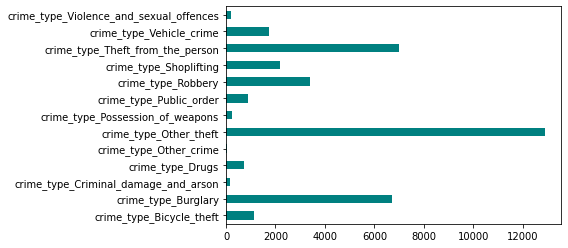

In [88]:
feature_scores_plot = pd.Series(fit_cov.scores_, new_columns)
feature_scores_plot.plot(kind = 'barh', color = 'teal')
plt.show()

In [89]:
k_best_scores_cov = np.sort(fit_cov.scores_)[-4:]
k_best_scores_cov

array([ 3401.21180606,  6732.07650105,  7013.33153786, 12903.81932244])

In [90]:
dtype = [('score', float), ('column', 'S50')]
score_feature_cov = zip(fit_cov.scores_, new_columns)
score_feature_list_cov = list(score_feature_cov)
score_feature_array_cov = np.array(score_feature_list_cov, dtype = dtype)
score_sorted_cov = np.sort(score_feature_array_cov, order=['score', 'column'])
k_best_cov = score_sorted_cov[-4:]
k_best_cov
#.decode('ascii')

array([( 3401.21180606, b'crime_type_Robbery'),
       ( 6732.07650105, b'crime_type_Burglary'),
       ( 7013.33153786, b'crime_type_Theft_from_the_person'),
       (12903.81932244, b'crime_type_Other_theft')],
      dtype=[('score', '<f8'), ('column', 'S50')])

In [ ]:
#Analyzing feature importance with k=4 for crime types monthly count when target variable is covid (binarized stringency)
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest


In [91]:
y_cov =  y_train.values
X_cov = X_train.values


In [92]:


test_cov_4 = SelectKBest(score_func=chi2, k=4)
fit_cov_4 = test_cov_4.fit(X_cov, y_cov)
fit_cov_4.scores_

array([ 1119.30762566,  6732.07650105,   148.98663364,   709.38424593,
          23.79862671, 12903.81932244,   241.10384451,   873.947215  ,
        3401.21180606,  2195.05669994,  7013.33153786,  1732.11148473,
         186.8729173 ])

In [93]:
fit_cov_4.pvalues_

array([2.10143278e-245, 0.00000000e+000, 2.88710349e-034, 2.72306145e-156,
       1.06958746e-006, 0.00000000e+000, 2.25954193e-054, 4.52350907e-192,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.53085750e-042])

In [94]:
k_best = test_cov_4.get_feature_names_out(new_columns)
k_best

array(['crime_type_Burglary', 'crime_type_Other_theft',
       'crime_type_Robbery', 'crime_type_Theft_from_the_person'],
      dtype=object)

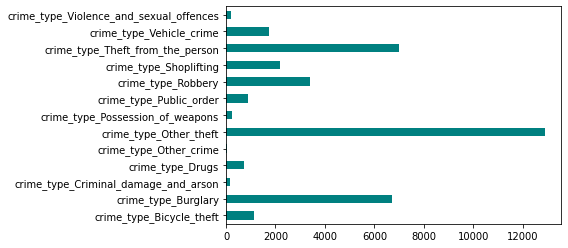

In [95]:
feature_scores_plot = pd.Series(fit_cov.scores_, new_columns)
feature_scores_plot.plot(kind = 'barh', color = 'teal')
plt.show()

In [96]:
k_best_scores_cov = np.sort(fit_cov.scores_)[-4:]
k_best_scores_cov

array([ 3401.21180606,  6732.07650105,  7013.33153786, 12903.81932244])

##Logistic regression on monthly crime count over months by type with binarized stringency (covid variable) as target 

In [ ]:
#Logistic regression on monthly crime count by type with binarized stringency (covid variable) as target 


In [ ]:
X_train.shape

(36, 13)

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logit.coef_.shape

(1, 13)

In [ ]:
# Predict labels on the Test set of independent variables
pred_logit = logit.predict(X_test)

# Predict probabilities on the Test set of independent variables
proba_logit = logit.predict_proba(X_test)

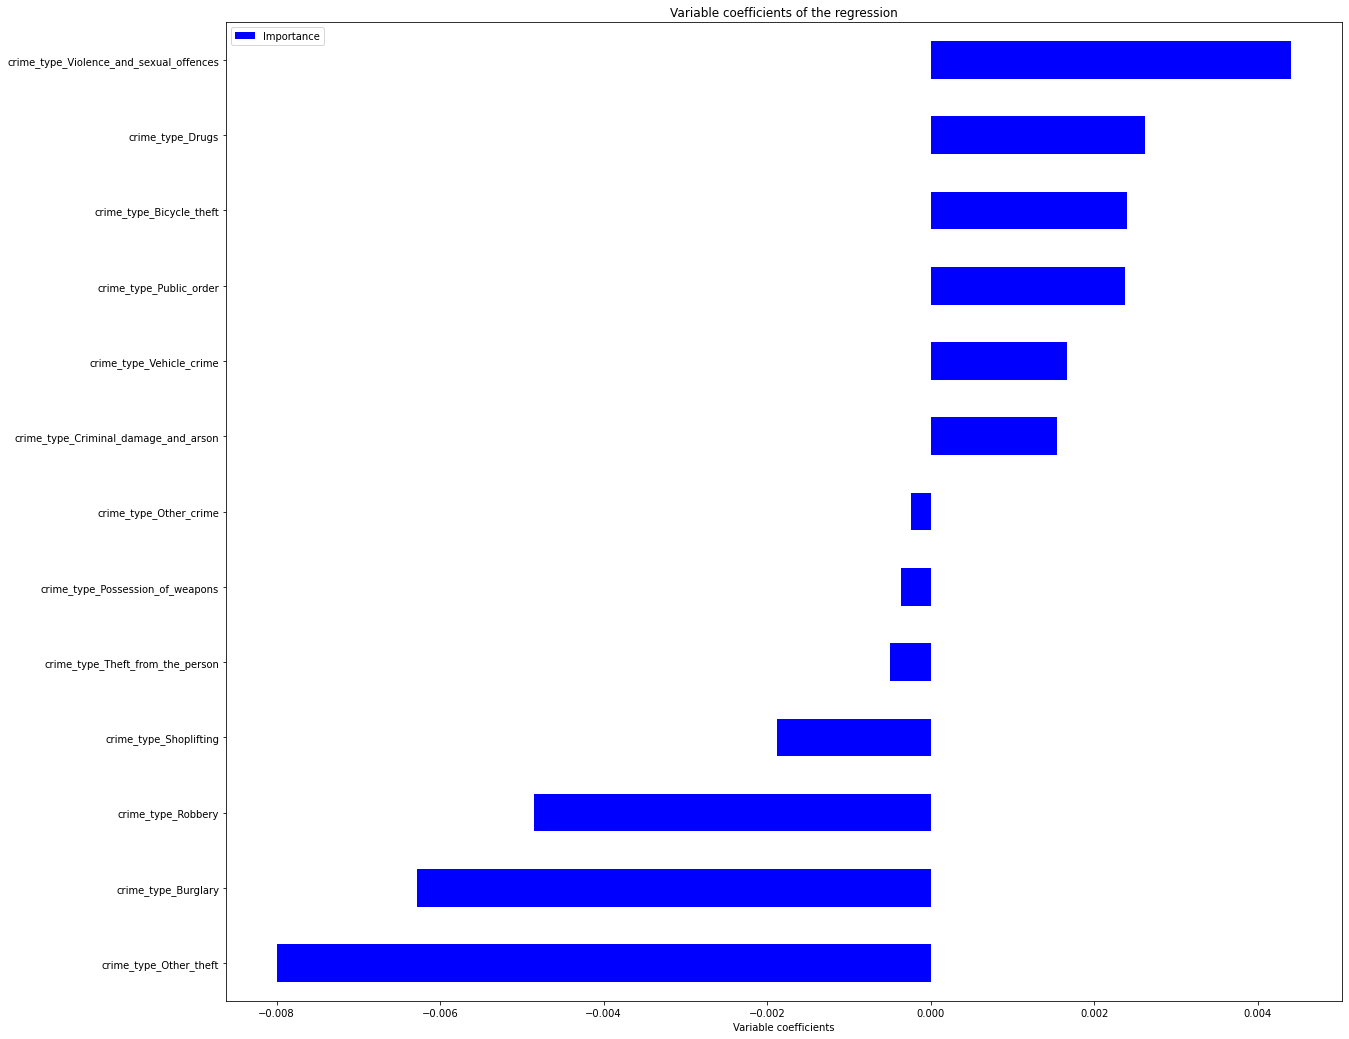

In [ ]:
# Plot feature importance
coefs = pd.DataFrame(logit.coef_.reshape((13, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])

coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the regression')
plt.show()

In [ ]:
from IPython.display import Math
from itertools import product

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, confusion_matrix, roc_curve, roc_auc_score,
                             accuracy_score, precision_score, recall_score)

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
thres = 0.5
target_predict_logit = np.where(proba_logit[:,1] > thres, 1, 0)
target_actual = y_test

In [ ]:
# Actual "positive" cases in train/test dataset? 

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))

% positive in train set (count/total): 41.67% (15/36)
% positive in test set (count/total): 44.44% (4/9)


In [ ]:
# Predicted "positive" cases

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 44.44% (4/9)


In [ ]:
# This is a function to 'prettify' confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Note that normalization here by default occurs across axis=1, or across each row (true class). 
    """
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

Confusion matrix, without normalization
[[5 0]
 [0 4]]
Normalized confusion matrix
[[100.   0.]
 [  0. 100.]]


<Figure size 432x288 with 0 Axes>

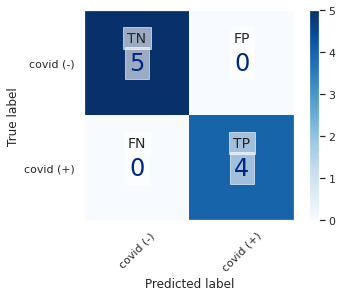

<Figure size 432x288 with 0 Axes>

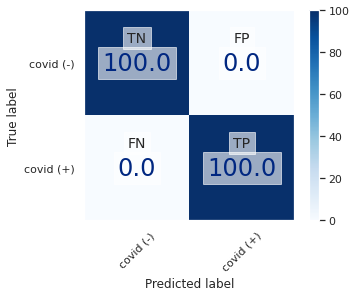

<Figure size 432x288 with 0 Axes>

In [ ]:
class_names = ['covid (-)', 'covid (+)']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [ ]:
print("Accuracy:", accuracy_score(y_test, pred_logit))
print("Precision:", precision_score(y_test, pred_logit))
print("Recall:", recall_score(y_test, pred_logit))

#It is possible to perfectly predict pandemic from crime counts

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


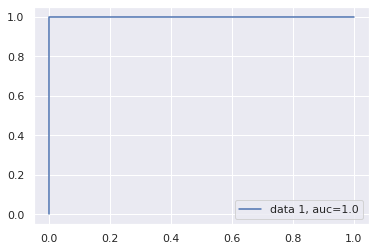

In [ ]:
#ROC curve
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

######Our model perfectly discriminates between pre-pandemic and pandemic based on crime counts, AUC score is 1.0

#Logistic regression on k=4 most important crime types monthly count over balanced months with binarized stringency (covid variable) as target

In [119]:
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_covid[k_best], target_covid, test_size = 0.2, random_state=5)

In [120]:
X_train.shape

(36, 4)

In [121]:
from sklearn.linear_model import LogisticRegression

# Let's compute the logistic regression
# Initiate your logistic model
logit = LogisticRegression()
# Fit your logistic regression model to your train model
logit.fit(X_train, y_train)

LogisticRegression()

In [122]:
logit.coef_.shape

(1, 4)

In [123]:
# Predict labels on your Test set of independent variables
#will this row be in 50k or under 50k category
pred_logit = logit.predict(X_test)

# Predict probabilities on your Test set of independent variables
#this will give us probabilities, how confident we are in those answears
proba_logit = logit.predict_proba(X_test)

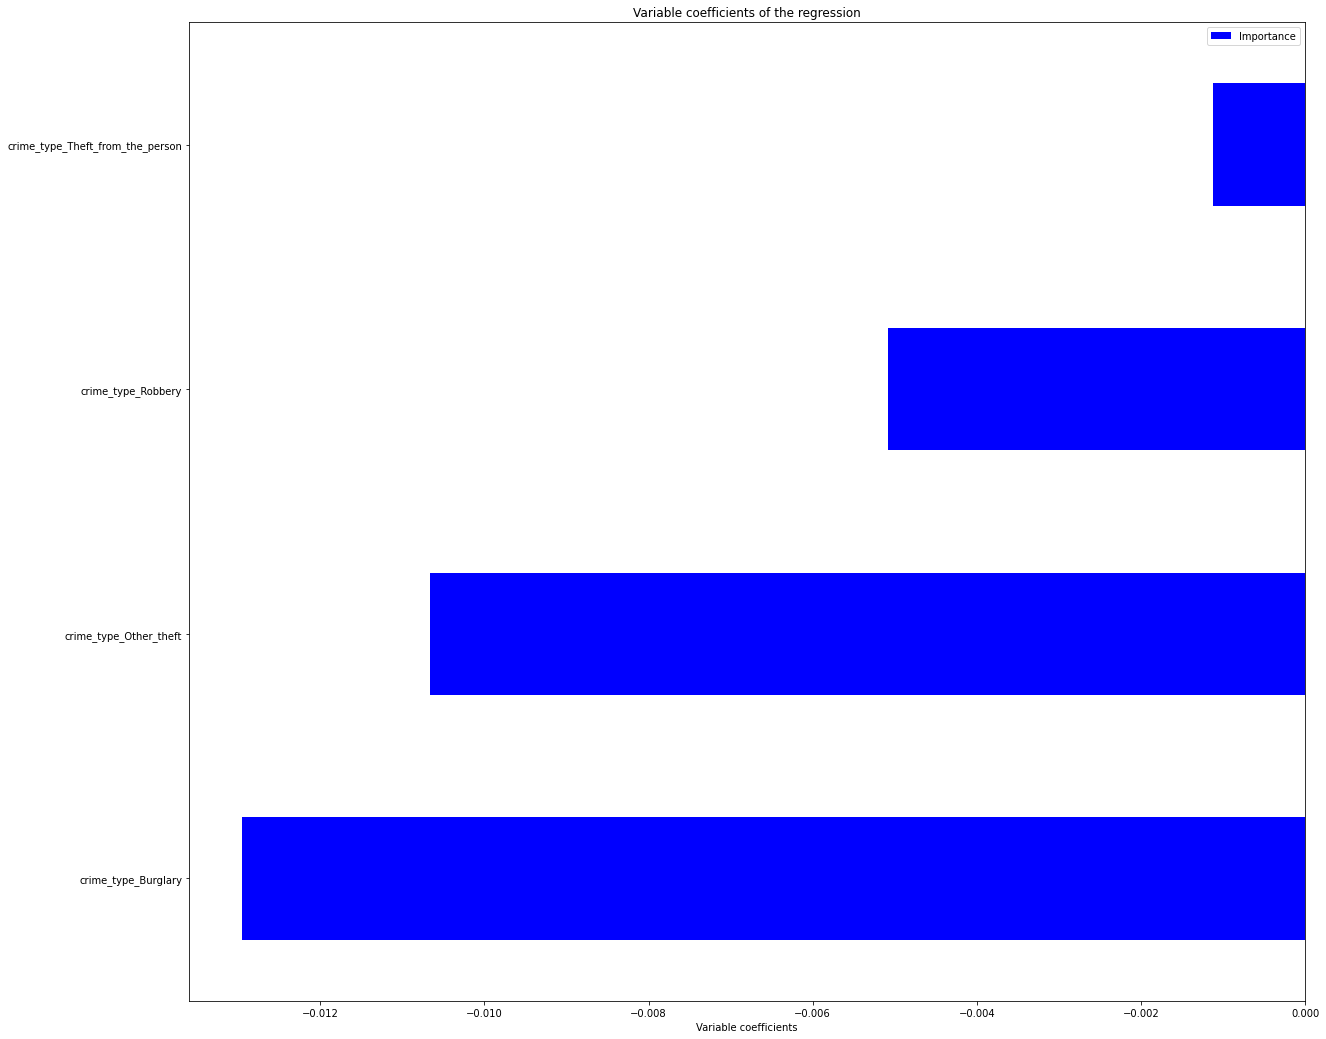

In [124]:
# Plot feature importance
coefs = pd.DataFrame(logit.coef_.reshape((4, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])

coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the regression')
plt.show()

In [125]:
from IPython.display import Math
from itertools import product


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, confusion_matrix, roc_curve, roc_auc_score,
                             accuracy_score, precision_score, recall_score)

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [126]:
thres = 0.5
target_predict_logit = np.where(proba_logit[:,1] > thres, 1, 0)
target_actual = y_test

In [127]:
# Actual "positive" cases in train/test dataset 

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))

% positive in train set (count/total): 41.67% (15/36)
% positive in test set (count/total): 44.44% (4/9)


In [128]:
# Predicted "positive" cases 

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 44.44% (4/9)


In [129]:
# This is a function to 'prettify' confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Note that normalization here by default occurs across axis=1, or across each row (true class). 
    """
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

Confusion matrix, without normalization
[[5 0]
 [0 4]]
Normalized confusion matrix
[[100.   0.]
 [  0. 100.]]


<Figure size 432x288 with 0 Axes>

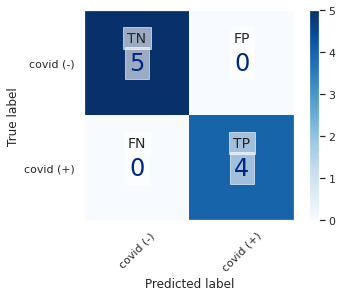

<Figure size 432x288 with 0 Axes>

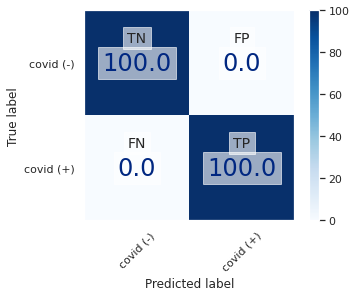

<Figure size 432x288 with 0 Axes>

In [130]:
class_names = ['covid (-)', 'covid (+)']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [131]:
print("Accuracy:", accuracy_score(y_test, pred_logit))
print("Precision:", precision_score(y_test, pred_logit))
print("Recall:", recall_score(y_test, pred_logit))

#It is possible to perfectly predict pandemic from crime counts

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


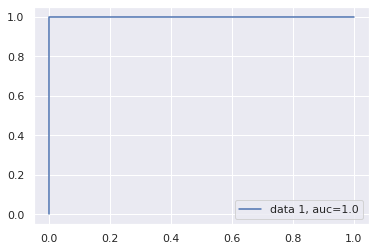

In [132]:
#ROC curve
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

######Our model perfectly discriminates between pre-pandemic and pandemic based on crime counts when using k-best features, the AUC score is 1.0

##k-fold cross-validation

In [133]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [134]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
 


In [135]:
acc_score = []
for train_index , test_index in kfold.split(features_covid):
    X_train , X_test = features_covid.iloc[train_index,:],features_covid.iloc[test_index,:]
    y_train , y_test = target_covid[train_index] , target_covid[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

acc_score

print('5-fold cross validation gave following accuracy scores', acc_score)     

5-fold cross validation gave following accuracy scores [1.0, 1.0, 1.0, 1.0, 1.0]


# We will now focus on the pandemic period to see if stringency of covid measures as a continuous variable is related to crime types

##Stringency by monthly total crime counts

In [19]:
df_balanced

month  ...  crime_type_Violence_and_sexual_offences
9781     2018-08  ...                                        0
9782     2018-08  ...                                        0
9783     2018-08  ...                                        0
9784     2018-08  ...                                        0
9785     2018-08  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2395166 rows x 16 columns]

In [20]:
london_pandemic = df_balanced[df_balanced['stringency'] > 0]
london_pandemic['stringency'].value_counts()

86.885161    103080
67.560333     64580
65.611379     64442
67.901333     64270
48.179000     63982
42.034000     63895
65.184000     63679
52.539310     63247
61.156333     61347
43.980000     60967
37.484000     60812
68.100690     59213
79.536000     56772
70.978966     56526
64.303103     55805
74.045000     51756
87.480370     47535
79.630000     44265
Name: stringency, dtype: int64

In [21]:
london_pandemic.groupby('month')['stringency'].mean()

month
2020-03    37.484000
2020-04    79.630000
2020-05    74.045000
2020-06    70.978966
2020-07    65.184000
2020-08    67.560333
2020-09    65.611379
2020-10    67.901333
2020-11    68.100690
2020-12    86.885161
2021-01    86.885161
2021-02    87.480370
2021-03    79.536000
2021-04    64.303103
2021-05    61.156333
2021-06    52.539310
2021-07    48.179000
2021-08    43.980000
2021-09    42.034000
Name: stringency, dtype: float64

In [23]:
crimes_by_stringency_by_month = london_pandemic.groupby('month')['stringency'].value_counts()
crimes_by_stringency_by_month

month    stringency
2020-03  37.484000     60812
2020-04  79.630000     44265
2020-05  74.045000     51756
2020-06  70.978966     56526
2020-07  65.184000     63679
2020-08  67.560333     64580
2020-09  65.611379     64442
2020-10  67.901333     64270
2020-11  68.100690     59213
2020-12  86.885161     55122
2021-01  86.885161     47958
2021-02  87.480370     47535
2021-03  79.536000     56772
2021-04  64.303103     55805
2021-05  61.156333     61347
2021-06  52.539310     63247
2021-07  48.179000     63982
2021-08  43.980000     60967
2021-09  42.034000     63895
Name: stringency, dtype: int64

In [24]:
crimes_stringency_month_df = crimes_by_stringency_by_month.sort_index(level=[1, 0]).to_frame()
crimes_stringency_month_df

stringency
month   stringency            
2020-03 37.484000        60812
2021-09 42.034000        63895
2021-08 43.980000        60967
2021-07 48.179000        63982
2021-06 52.539310        63247
2021-05 61.156333        61347
2021-04 64.303103        55805
2020-07 65.184000        63679
2020-09 65.611379        64442
2020-08 67.560333        64580
2020-10 67.901333        64270
2020-11 68.100690        59213
2020-06 70.978966        56526
2020-05 74.045000        51756
2021-03 79.536000        56772
2020-04 79.630000        44265
2020-12 86.885161        55122
2021-01 86.885161        47958
2021-02 87.480370        47535

In [25]:
crimes_stringency_month_df.rename({'stringency': 'crime_count'}, axis = 1, inplace = True)
crimes_stringency_month_df.reset_index(level='stringency', inplace = True)

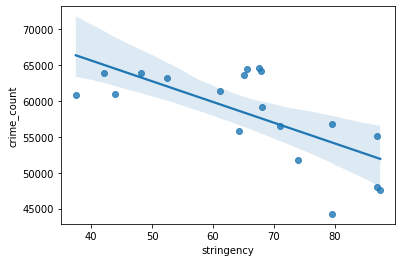

In [26]:
sns.regplot(data = crimes_stringency_month_df, x = crimes_stringency_month_df['stringency'], y = crimes_stringency_month_df['crime_count'])

In [27]:
#Crimes total by month is highly correlated with stringency
crimes_stringency_month_df.corr()

stringency  crime_count
stringency     1.000000    -0.689678
crime_count   -0.689678     1.000000

##Montly crime counts by type and stringency

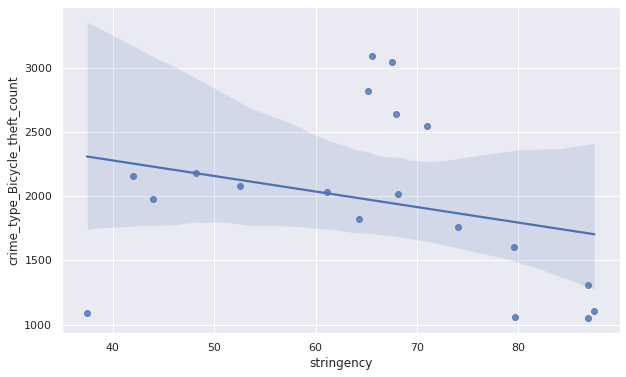

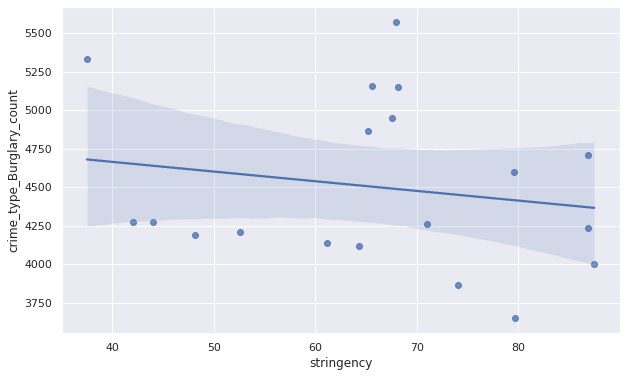

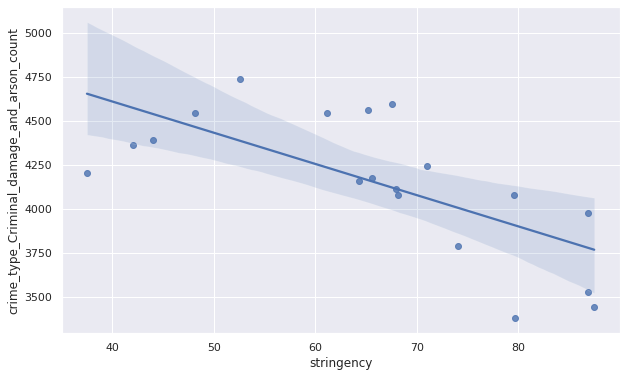

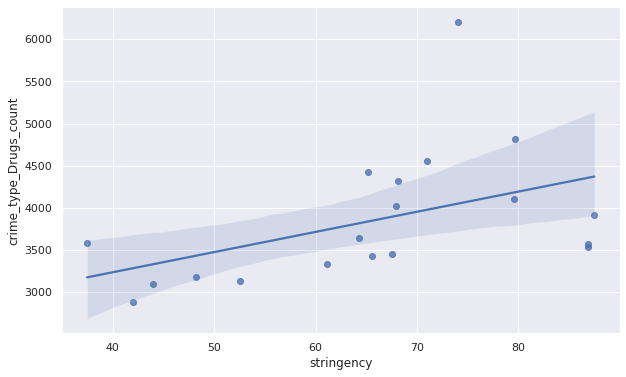

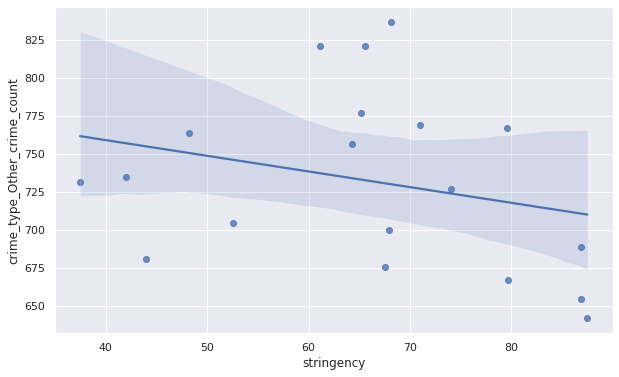

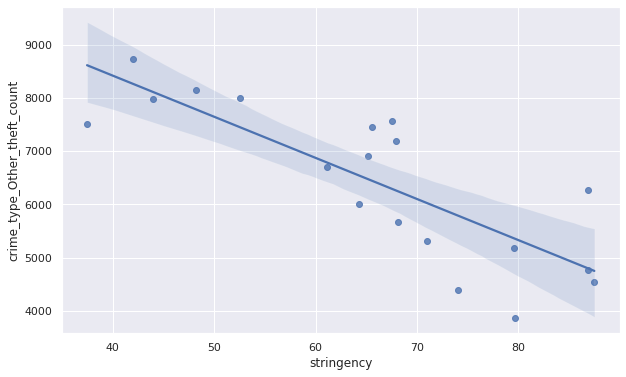

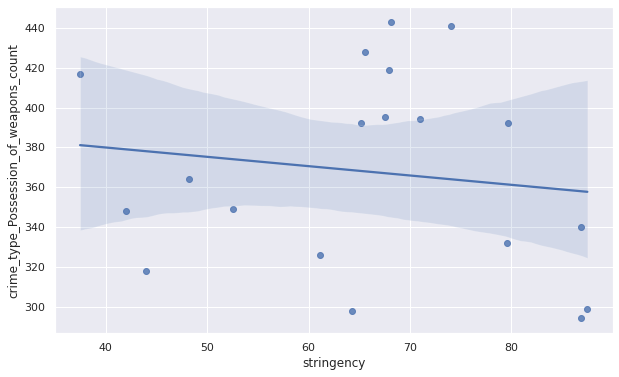

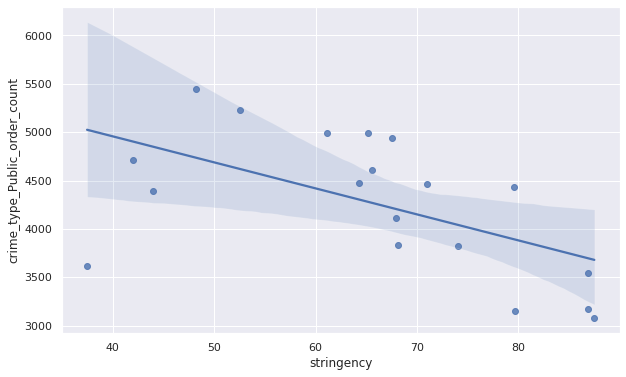

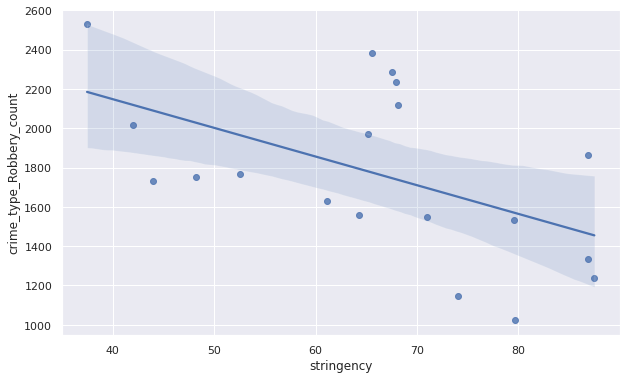

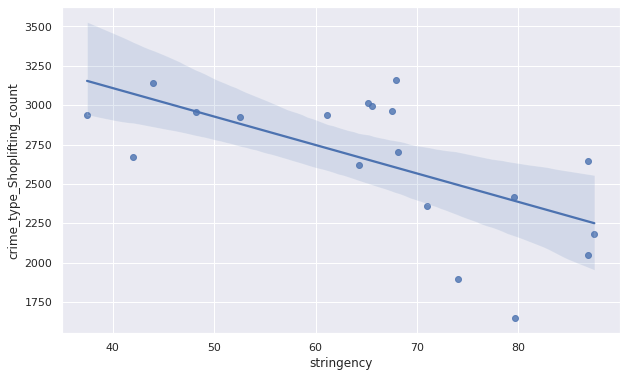

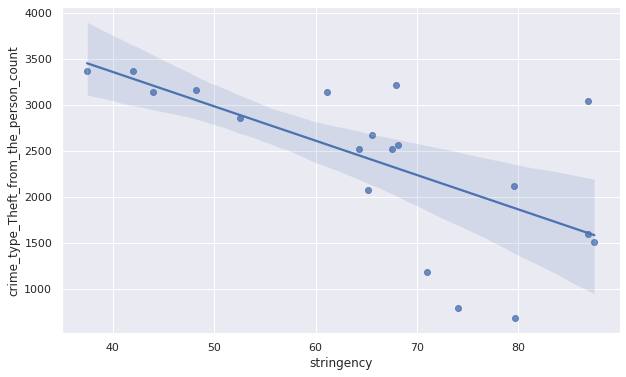

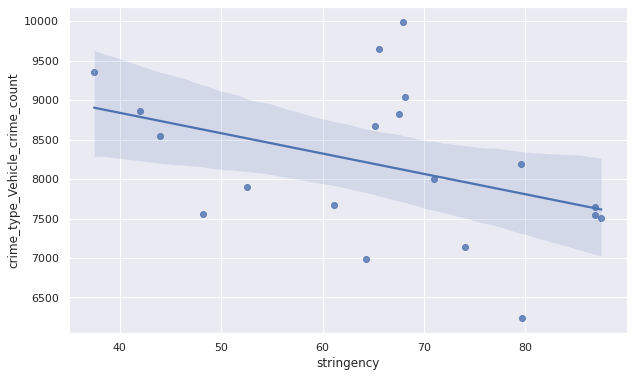

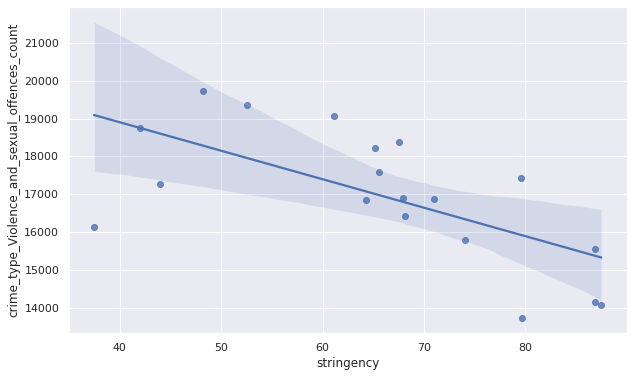

In [ ]:
for col in new_columns:
  crime_df = london_pandemic[london_pandemic[f'{col}'] == 1].groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
  crime_df.rename({'stringency': f'{col}_count'}, axis = 1, inplace = True)
  crime_df.reset_index(level='stringency', inplace = True)
  plt.figure(figsize = (10, 6))
  ax = sns.regplot(data = crime_df, x = crime_df['stringency'], y = crime_df[f'{col}_count'])

##Dsitribution of stringency by month

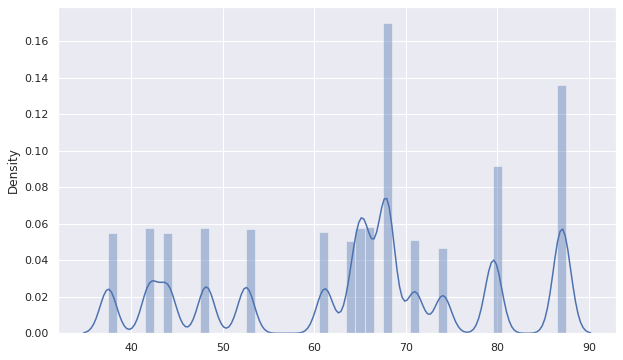

In [ ]:
london_pandemic
plt.figure(figsize = (10, 6))
ax = sns.distplot(x = london_pandemic['stringency'])

##Relationship between monthly crime count and stringency over the pandemic period - regression

In [ ]:
#Relationship between monthly crime count and stringency - regression 

In [28]:
target_pan = london_pandemic.groupby('month')['stringency'].mean()
features_pan = london_pandemic.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()


In [29]:
cr_count_pandemic_df = pd.concat((features_pan, target_pan), axis = 1)

In [30]:
cr_count_pandemic_df.corr()


crime_type_Bicycle_theft  ...  stringency
crime_type_Bicycle_theft                                 1.000000  ...   -0.279982
crime_type_Burglary                                      0.426907  ...   -0.179445
crime_type_Criminal_damage_and_arson                     0.672712  ...   -0.686787
crime_type_Drugs                                        -0.121078  ...    0.468075
crime_type_Other_crime                                   0.453500  ...   -0.271226
crime_type_Other_theft                                   0.532136  ...   -0.810079
crime_type_Possession_of_weapons                         0.421240  ...   -0.144349
crime_type_Public_order                                  0.731858  ...   -0.565989
crime_type_Robbery                                       0.534690  ...   -0.524220
crime_type_Shoplifting                                   0.611911  ...   -0.627418
crime_type_Theft_from_the_person                         0.259937  ...   -0.656672
crime_type_Vehicle_crime                                 0.561700  ...   -0.404988
crime_type_Violence_and_sexual_offences                  0.678731  ...   -0.649222
stringency                                              -0.279982  ...    1.000000

[14 rows x 14 columns]

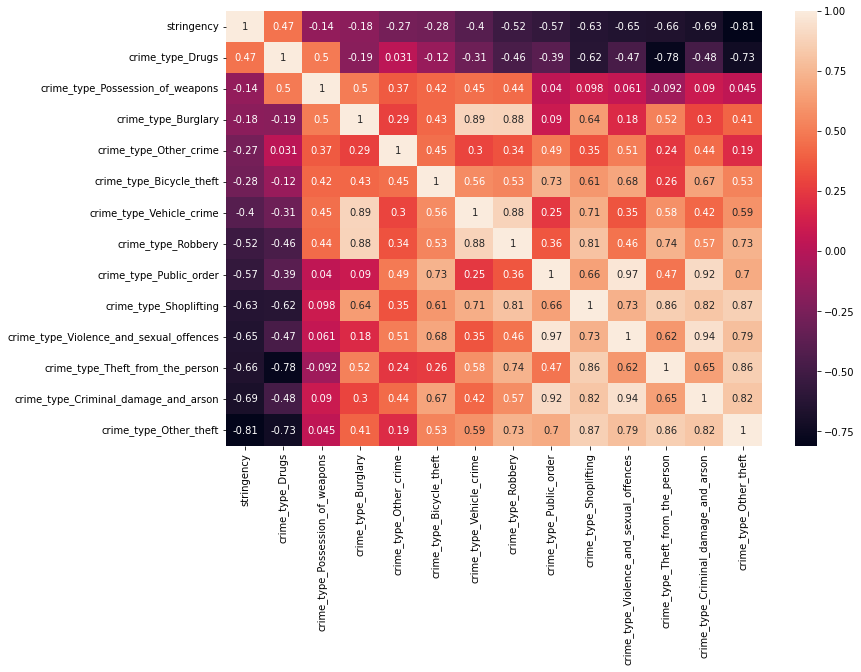

In [31]:
k = 14
cols = cr_count_pandemic_df.corr().nlargest(k, 'stringency')['stringency'].index

cm = cr_count_pandemic_df[cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True)

In [32]:
#Linear regression on crime counts per month and stringency during pandemic

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_pan, target_pan, test_size = 0.2, random_state = 42)

In [33]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)


LinearRegression()

In [34]:
y_prediction =  model.predict(x_test)
y_prediction

array([ 62.26035021,  95.0250211 , 106.96564441,  86.13041637])

In [46]:
coeffs = zip(cols, model.coef_)


In [47]:
print("Coefficients: \n")
for coeff in coeffs:
  print(coeff)
print("\nIntercept: \n", model.intercept_)


Coefficients: 

('stringency', 0.01205221517748731)
('crime_type_Drugs', -0.002509871615565675)
('crime_type_Possession_of_weapons', -0.05866121684282305)
('crime_type_Burglary', -0.0029465351759357292)
('crime_type_Other_crime', -0.20574580699931705)
('crime_type_Bicycle_theft', -0.019936061025294494)
('crime_type_Vehicle_crime', -0.1728284699328028)
('crime_type_Robbery', -0.07336232921541705)
('crime_type_Public_order', 0.08629184599614645)
('crime_type_Shoplifting', 0.04975779758468662)
('crime_type_Violence_and_sexual_offences', -0.03017319023364469)
('crime_type_Theft_from_the_person', -0.02159229750405714)
('crime_type_Criminal_damage_and_arson', 0.042733010728094434)

Intercept: 
 207.4611548850131


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
y_pred = model.predict(x_test)  

mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE score is {}'.format(mae)) 
print('RMSE is {}'.format(rmse)) 
print('R2 score is {}'.format(r2)) 

#R2 is small and negative, our model does not fit the data well

The model performance for testing set
--------------------------------------
MAE score is 19.55668209847191
RMSE is 21.154833499075416
R2 score is -0.23783933169134142


##k-fold cross-validation - linear regression on pandemic data

In [183]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [184]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
 


In [185]:
target_pan = london_pandemic.groupby('month')['stringency'].mean()
features_pan = london_pandemic.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()

In [186]:
target_pan

month
2020-03    37.484000
2020-04    79.630000
2020-05    74.045000
2020-06    70.978966
2020-07    65.184000
2020-08    67.560333
2020-09    65.611379
2020-10    67.901333
2020-11    68.100690
2020-12    86.885161
2021-01    86.885161
2021-02    87.480370
2021-03    79.536000
2021-04    64.303103
2021-05    61.156333
2021-06    52.539310
2021-07    48.179000
2021-08    43.980000
2021-09    42.034000
Name: stringency, dtype: float64

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2_scores = []
mae_scores = []
rmse_scores = []
for train_index , test_index in kfold.split(features_pan):
    X_train , X_test = features_pan.iloc[train_index,:],features_pan.iloc[test_index,:]
    y_train , y_test = target_pan[train_index] , target_pan[test_index]
   
    #model = LinearRegression()
    model.fit(X_train, y_train)
    y_prediction =  model.predict(X_test)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
    y_pred = model.predict(X_test)  

    mae = mean_absolute_error(y_test, y_pred)
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)      
    
    R2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)



print('5-fold cross validation gave following R2 scores', R2_scores)
print('mean R2', sum(R2_scores)/5)
print('5-fold cross validation gave following MAE scores', mae_scores)
print('mean MAE', sum(mae_scores)/5)
print('5-fold cross validation gave following RMSE scores', rmse_scores)
print('mean RMSE', sum(rmse_scores)/5)

#5-fold cross-validation showed that due to our subset being small and the target being not normally distributed our model fits data poorly

5-fold cross validation gave following R2 scores [-11.112934459058641, -0.2755218342547894, 0.1355344432210086, -2.28608787632993, 0.7202892750945462]
mean R2 -2.563744090265561
5-fold cross validation gave following MAE scores [15.733580983935472, 14.924590229032246, 6.531560944672503, 21.22806088605033, 3.478430946582968]
mean MAE 12.379244798054703
5-fold cross validation gave following RMSE scores [19.28368088872615, 16.936305996837365, 8.052393062019801, 22.364182074879942, 3.984198099053454]
mean RMSE 14.124152024303346


#Linear regression on crime counts per month and stringency during pandemic [5 most correlated features]

In [ ]:
#Linear regression on crime counts per month and stringency during pandemic [5 most correlated features]

In [171]:
#5 most correlated features
cols[-5:]

Index(['crime_type_Theft_from_the_person', 'crime_type_Robbery',
       'crime_type_Burglary', 'crime_type_Shoplifting',
       'crime_type_Other_theft'],
      dtype='object')

In [105]:
#Linear regression on crime counts per month and stringency during pandemic
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features_pan[cols[-5:]], target_pan, test_size = 0.2, random_state = 42)

In [106]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
model = LinearRegression()
# fitting the training data
model.fit(x_train,y_train)


LinearRegression()

In [107]:
y_prediction =  model.predict(x_test)
y_prediction

array([65.24631548, 56.74934476, 79.06069735, 82.496514  ])

In [113]:
coeffs = zip(cols[-5:], model.coef_)

In [114]:
print("Coefficients: \n")
for coef in coeffs:
  print(coef)
print("\nIntercept: \n", model.intercept_)


Coefficients: 

('crime_type_Theft_from_the_person', 0.004981020236029447)
('crime_type_Robbery', -0.009824097837156025)
('crime_type_Burglary', 0.01576857989049442)
('crime_type_Shoplifting', -0.01067601902041786)
('crime_type_Other_theft', -0.007834002959577743)

Intercept: 
 79.43794809363746


In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
y_pred = model.predict(x_test) # using the model we fitted earlier, we get predictions 

mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE score is {}'.format(mae)) # can range from 0 to ∞
print('RMSE is {}'.format(rmse)) # can range from 0 to ∞
print('R2 score is {}'.format(r2)) # 0 to 1

##The model using 5 most correlated features fits our data better, the R2 is now positive and has a larger absolute value. R2 is small as the target - stringecy by month is not normally distributed and the data set is small

The model performance for testing set
--------------------------------------
MAE score is 12.464872768480847
RMSE is 15.546152506235277
R2 score is 0.33151617615275963


##k-fold cross-validation - linear regression on pandemic data with 5 most correlated features

In [172]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [173]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
 


In [175]:
target_pan = london_pandemic.groupby('month')['stringency'].mean()
features_pan = london_pandemic.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()

In [179]:
list(cols[-5:])

['crime_type_Theft_from_the_person',
 'crime_type_Robbery',
 'crime_type_Burglary',
 'crime_type_Shoplifting',
 'crime_type_Other_theft']

In [181]:
features_pan_5 = features_pan[list(cols[-5:])]

In [182]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2_scores = []
mae_scores = []
rmse_scores = []
for train_index , test_index in kfold.split(features_pan_5):
    X_train , X_test = features_pan_5.iloc[train_index,:],features_pan_5.iloc[test_index,:]
    y_train , y_test = target_pan[train_index] , target_pan[test_index]
   
    #model = LinearRegression()
    model.fit(X_train, y_train)
    y_prediction =  model.predict(X_test)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
    y_pred = model.predict(X_test)  

    mae = mean_absolute_error(y_test, y_pred)
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)      
    
    R2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)



print('5-fold cross validation gave following R2 scores', R2_scores)
print('mean R2', sum(R2_scores)/5)
print('5-fold cross validation gave following MAE scores', mae_scores)
print('mean MAE', sum(mae_scores)/5)
print('5-fold cross validation gave following RMSE scores', rmse_scores)
print('mean RMSE', sum(rmse_scores)/5)

#5-fold cross-validation showed that due to our subset being small and the target being not normally distributed our model with most correlated 5 features fits data better than the model with all features, but still poorly

5-fold cross validation gave following R2 scores [-1.0630837424010369, 0.5114478400742708, -1.0205171322003896, -0.45217548391038886, 0.9150888757137118]
mean R2 -0.2218479285447666
5-fold cross validation gave following MAE scores [7.064936575388689, 7.784564496064961, 8.344061678325993, 11.575744756025811, 1.8964366409804423]
mean MAE 7.33314882935718
5-fold cross validation gave following RMSE scores [7.958361832283634, 10.481663470802317, 12.310689778215345, 14.86698773279928, 2.195172534093554]
mean RMSE 9.562575069638827


#Stringency pre and during pandemic by total monthly crime counts

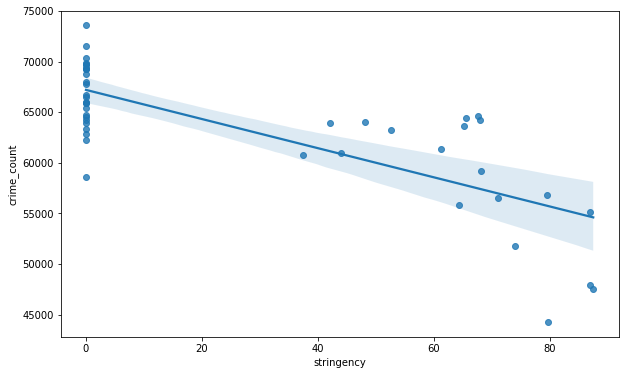

In [54]:
london_balanced_ = data_encoded.groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
london_balanced_.rename({'stringency': 'crime_count'}, axis = 1, inplace = True)
london_balanced_.reset_index(level='stringency', inplace = True)
plt.figure(figsize = (10, 6))
ax = sns.regplot(data = london_balanced_, x = london_balanced_['stringency'], y = london_balanced_['crime_count'])

In [55]:
london_balanced_.corr()
#Monthly crime total is very highly correlated to Covid-19 measures

stringency  crime_count
stringency     1.000000    -0.764979
crime_count   -0.764979     1.000000

##Stringency by monthly crime counts by type pre and during pandemic

In [53]:
data_encoded

month  ...  crime_type_Violence_and_sexual_offences
0        2018-01  ...                                        0
1        2018-01  ...                                        0
2        2018-01  ...                                        0
3        2018-01  ...                                        0
4        2018-01  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2844241 rows x 16 columns]

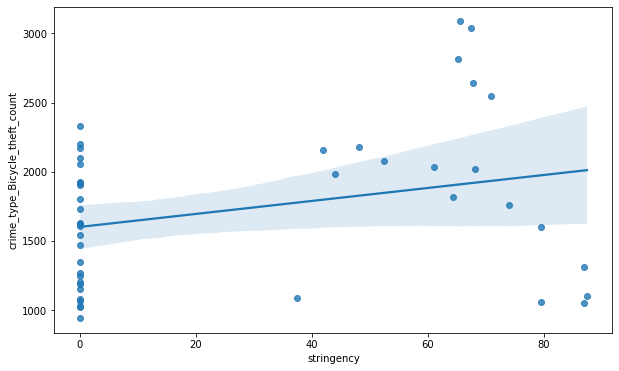

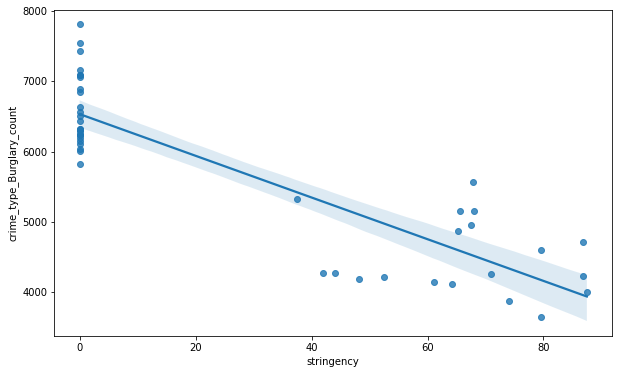

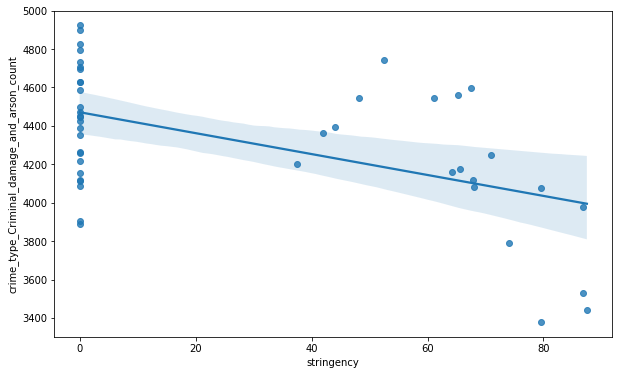

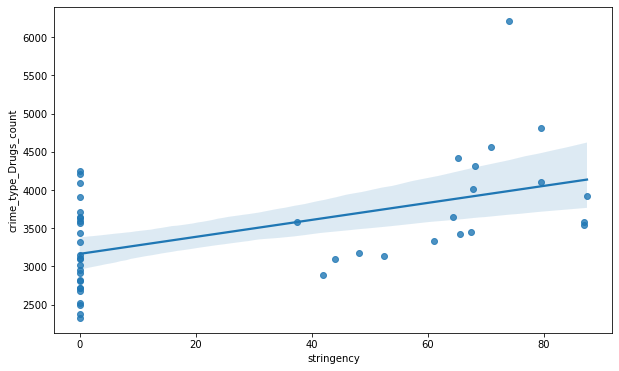

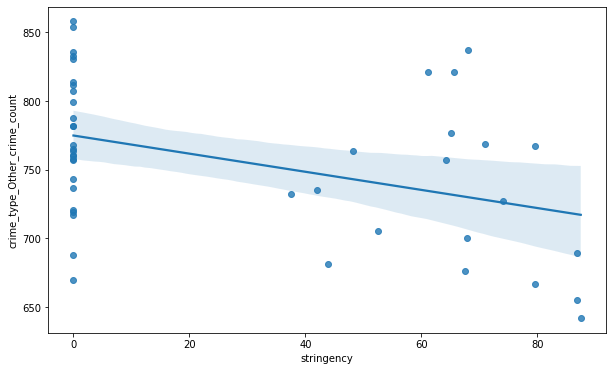

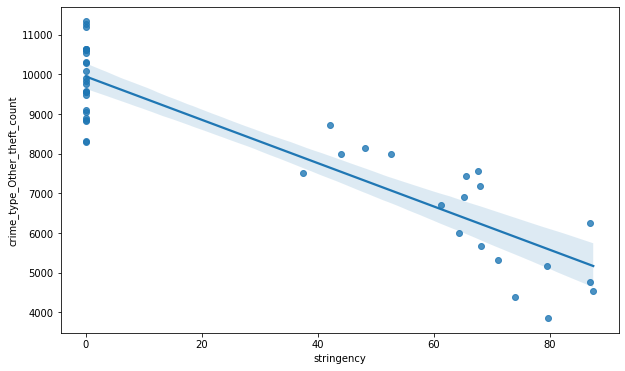

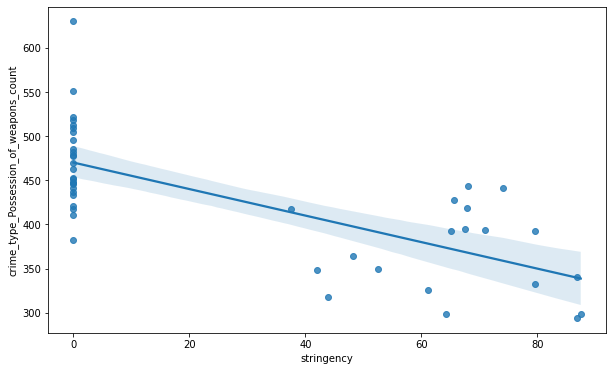

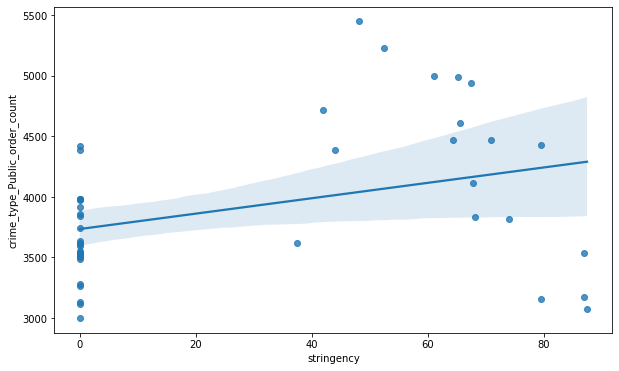

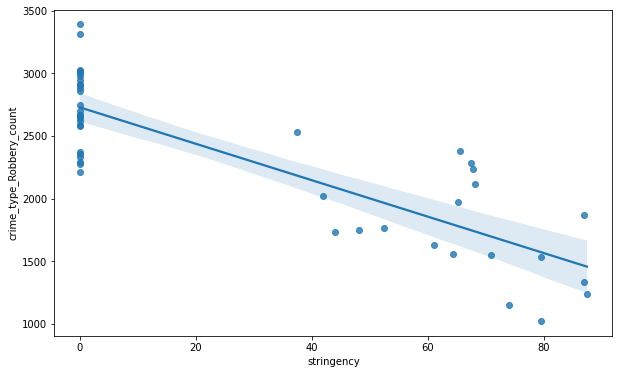

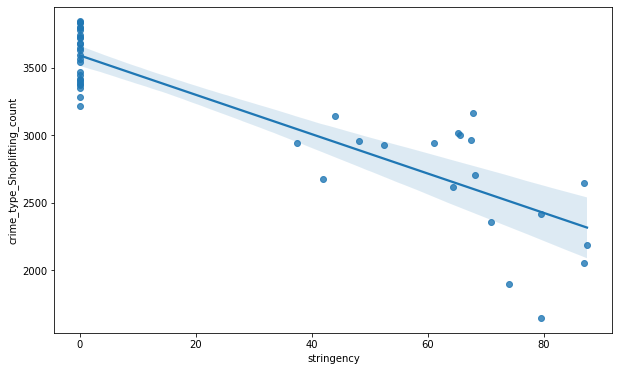

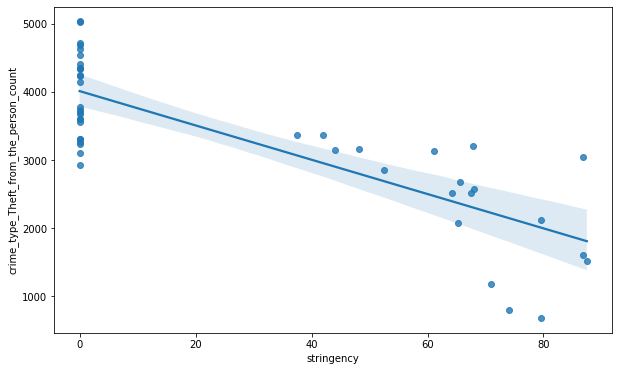

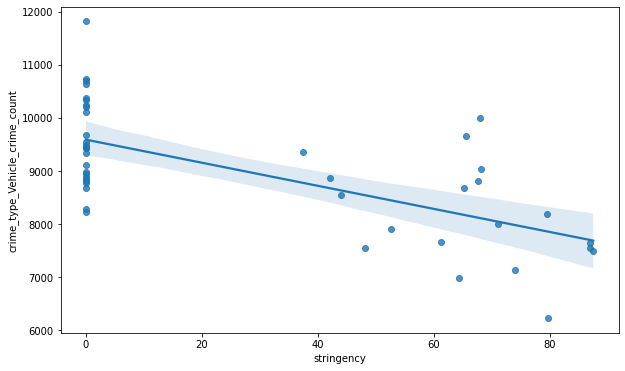

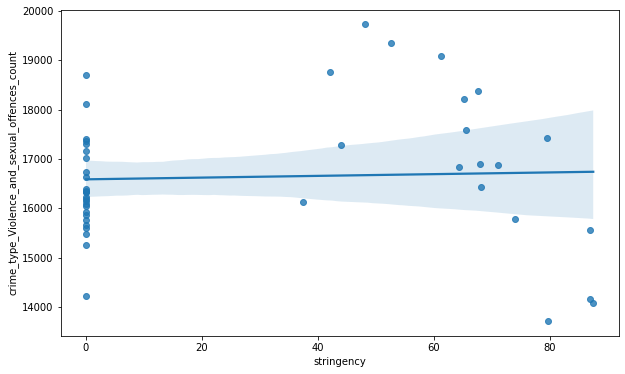

In [61]:
for col in new_columns:
  crime_df = data_encoded[data_encoded[f'{col}'] == 1].groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
  crime_df.rename({'stringency': f'{col}_count'}, axis = 1, inplace = True)
  crime_df.reset_index(level='stringency', inplace = True)
  plt.figure(figsize = (10, 6))
  ax = sns.regplot(data = crime_df, x = crime_df['stringency'], y = crime_df[f'{col}_count'])

#Mothly crime counts were affected differently depending on the type of crime

##Relationship between monthly crime counts by type and stringency pre- and during pandemic

In [62]:
target = data_encoded.groupby('month')['stringency'].mean()
features = data_encoded.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()


In [63]:
crime_count_df = pd.concat((features, target), axis = 1)

In [64]:
crime_count_df.corr()


crime_type_Bicycle_theft  ...  stringency
crime_type_Bicycle_theft                                 1.000000  ...    0.283576
crime_type_Burglary                                     -0.293872  ...   -0.872104
crime_type_Criminal_damage_and_arson                     0.316181  ...   -0.511257
crime_type_Drugs                                         0.078429  ...    0.518334
crime_type_Other_crime                                   0.249594  ...   -0.402159
crime_type_Other_theft                                  -0.080961  ...   -0.903141
crime_type_Possession_of_weapons                        -0.079309  ...   -0.712643
crime_type_Public_order                                  0.746570  ...    0.353530
crime_type_Robbery                                      -0.121395  ...   -0.834416
crime_type_Shoplifting                                  -0.077189  ...   -0.883787
crime_type_Theft_from_the_person                        -0.234823  ...   -0.805617
crime_type_Vehicle_crime                                -0.081097  ...   -0.651606
crime_type_Violence_and_sexual_offences                  0.691530  ...    0.044080
stringency                                               0.283576  ...    1.000000

[14 rows x 14 columns]

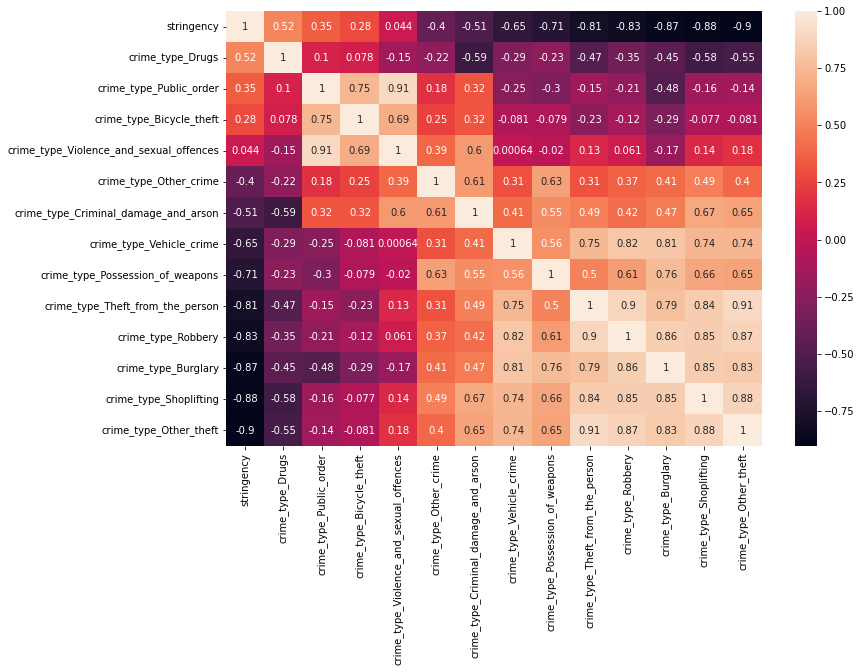

In [65]:
k = 14
cols = crime_count_df.corr().nlargest(k, 'stringency')['stringency'].index
cm = crime_count_df[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True)

In [66]:
#Linear regression

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [67]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)


LinearRegression()

In [68]:
y_prediction =  model.predict(x_test)
y_prediction

array([ 73.58511743,   3.83508744,  38.53530726,  51.83668907,
        62.71857483,  48.23522854, -13.04794519, -10.68090154,
        10.0200328 ])

In [69]:
print("Coefficients: \n", model.coef_)
print("Intercept: \n", model.intercept_)

# print("Equation: y = {:.2f} + {:.2f}*x1 + {:.2f}*x2".format(model.intercept_, model.coef_[0],
#                                                           model.coef_[1]))

Coefficients: 
 [ 0.01676384 -0.00488038  0.02287894  0.00034212  0.00391095 -0.01332654
 -0.05476378  0.00941469 -0.0084858  -0.02901089  0.01625061  0.00626654
 -0.00805855]
Intercept: 
 158.20526784030372


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
y_pred = model.predict(x_test) 

mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE score is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2)) 

#Our model fits the data very well, R2 is very high (0.87), 
#it would be even higher if we would have used data balanced over months with respect to pre- and during pandemic, but because our data is limited in quantity we decided not to drop months from the pre-pandemic period

The model performance for testing set
--------------------------------------
MAE score is 9.360516170748943
RMSE is 11.30868446603344
R2 score is 0.8684064156109627


##k-fold cross-validation - linear regression on pandemic data

In [189]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [190]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
 


In [191]:
target = data_encoded.groupby('month')['stringency'].mean()
features = data_encoded.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()

In [193]:
target

month
2018-01     0.000000
2018-02     0.000000
2018-03     0.000000
2018-04     0.000000
2018-05     0.000000
2018-06     0.000000
2018-07     0.000000
2018-08     0.000000
2018-09     0.000000
2018-10     0.000000
2018-11     0.000000
2018-12     0.000000
2019-01     0.000000
2019-02     0.000000
2019-03     0.000000
2019-04     0.000000
2019-05     0.000000
2019-06     0.000000
2019-07     0.000000
2019-08     0.000000
2019-09     0.000000
2019-10     0.000000
2019-11     0.000000
2019-12     0.000000
2020-01     0.000000
2020-02     0.000000
2020-03    37.484000
2020-04    79.630000
2020-05    74.045000
2020-06    70.978966
2020-07    65.184000
2020-08    67.560333
2020-09    65.611379
2020-10    67.901333
2020-11    68.100690
2020-12    86.885161
2021-01    86.885161
2021-02    87.480370
2021-03    79.536000
2021-04    64.303103
2021-05    61.156333
2021-06    52.539310
2021-07    48.179000
2021-08    43.980000
2021-09    42.034000
Name: stringency, dtype: float64

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2_scores = []
mae_scores = []
rmse_scores = []
for train_index , test_index in kfold.split(features):
    X_train , X_test = features.iloc[train_index,:],features.iloc[test_index,:]
    y_train , y_test = target[train_index] , target[test_index]
   
    #model = LinearRegression()
    model.fit(X_train, y_train)
    y_prediction =  model.predict(X_test)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
    y_pred = model.predict(X_test)  

    mae = mean_absolute_error(y_test, y_pred)
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)      
    
    R2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)



print('5-fold cross validation gave following R2 scores', R2_scores)
print('mean R2', sum(R2_scores)/5)
print('5-fold cross validation gave following MAE scores', mae_scores)
print('mean MAE', sum(mae_scores)/5)
print('5-fold cross validation gave following RMSE scores', rmse_scores)
print('mean RMSE', sum(rmse_scores)/5)

#5-fold cross-validation showed that our model fits the data very well, there is clear relationship monthly crime counts by type and Covid-19 measures

5-fold cross validation gave following R2 scores [0.9065211330154049, 0.9371111839231624, 0.8608741728576044, 0.9060925974407679, 0.8797903214997788]
mean R2 0.8980778817473437
5-fold cross validation gave following MAE scores [7.770724955695584, 6.3703992903626325, 9.19695418729236, 9.145572568081624, 11.392544177853049]
mean MAE 8.77523903585705
5-fold cross validation gave following RMSE scores [8.982440880824825, 7.399286048169518, 11.425602756554145, 10.145449869036108, 13.86987480044185]
mean RMSE 10.36453087100529


#Crime by borough

In [195]:
crime_borough_df = pd.get_dummies(data[['month', 'crime type', 'borough_london', 'stringency', 'covid']], columns = ['crime type'])

In [196]:
crime_borough_df

month  ... crime type_Violence and sexual offences
0        2018-01  ...                                       0
1        2018-01  ...                                       0
2        2018-01  ...                                       0
3        2018-01  ...                                       0
4        2018-01  ...                                       0
...          ...  ...                                     ...
2844236  2021-09  ...                                       0
2844237  2021-09  ...                                       0
2844238  2021-09  ...                                       1
2844239  2021-09  ...                                       1
2844240  2021-09  ...                                       1

[2844241 rows x 17 columns]

In [197]:
crime_borough_df['borough_london'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [198]:
len(crime_borough_df['borough_london'].unique())

33

In [199]:
crime_month_by_borough = crime_borough_df.groupby(['month', 'borough_london']).agg(lambda x: x.mean() if x.name == 'stringency' or x.name == 'covid' else x.sum() )

In [200]:
crime_month_by_borough.index.values


array([('2018-01', 'Barking and Dagenham'), ('2018-01', 'Barnet'),
       ('2018-01', 'Bexley'), ..., ('2021-09', 'Waltham Forest'),
       ('2021-09', 'Wandsworth'), ('2021-09', 'Westminster')],
      dtype=object)

In [201]:
#data for an example borough
crime_month_by_borough.loc(axis = 0)[:, 'Barnet'].sum()

stringency                                  1249.474141
covid                                         19.000000
crime type_Bicycle theft                     872.000000
crime type_Burglary                        11616.000000
crime type_Criminal damage and arson        6861.000000
crime type_Drugs                            3069.000000
crime type_Other crime                      1126.000000
crime type_Other theft                     11910.000000
crime type_Possession of weapons             463.000000
crime type_Public order                     6023.000000
crime type_Robbery                          2966.000000
crime type_Shoplifting                      5550.000000
crime type_Theft from the person            2552.000000
crime type_Vehicle crime                   19731.000000
crime type_Violence and sexual offences    24848.000000
dtype: float64

In [202]:
crime_month_by_borough.index

MultiIndex([('2018-01', 'Barking and Dagenham'),
            ('2018-01',               'Barnet'),
            ('2018-01',               'Bexley'),
            ('2018-01',                'Brent'),
            ('2018-01',              'Bromley'),
            ('2018-01',               'Camden'),
            ('2018-01',       'City of London'),
            ('2018-01',              'Croydon'),
            ('2018-01',               'Ealing'),
            ('2018-01',              'Enfield'),
            ...
            ('2021-09',               'Merton'),
            ('2021-09',               'Newham'),
            ('2021-09',            'Redbridge'),
            ('2021-09', 'Richmond upon Thames'),
            ('2021-09',            'Southwark'),
            ('2021-09',               'Sutton'),
            ('2021-09',        'Tower Hamlets'),
            ('2021-09',       'Waltham Forest'),
            ('2021-09',           'Wandsworth'),
            ('2021-09',          'Westminster')],
   

In [203]:
crime_month_by_borough_ = crime_month_by_borough.drop('covid', axis = 1)

In [205]:
borough_corr = []
for index, borough in enumerate(crime_month_by_borough.index):
  borough_df = crime_month_by_borough_.loc(axis = 0)[:, f'{borough[1]}']
  borough_corr.append(borough_df.corr())
  
borough_corr  

[                                         stringency  ...  crime type_Violence and sexual offences
 stringency                                 1.000000  ...                                 0.276561
 crime type_Bicycle theft                  -0.086743  ...                                 0.351252
 crime type_Burglary                       -0.685290  ...                                -0.426002
 crime type_Criminal damage and arson      -0.182760  ...                                 0.372993
 crime type_Drugs                           0.735210  ...                                 0.310085
 crime type_Other crime                     0.262372  ...                                 0.027137
 crime type_Other theft                    -0.553371  ...                                 0.107750
 crime type_Possession of weapons          -0.095824  ...                                -0.120036
 crime type_Public order                    0.351613  ...                                 0.699615
 crime typ

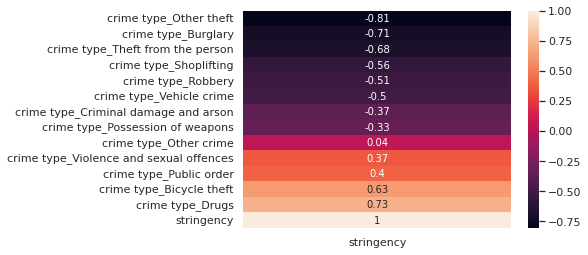

In [206]:
#Example: correlation matrix for stringency and crime types for Barnet
sns.heatmap(borough_corr[1]['stringency'].sort_values().to_frame(), annot = True)

In [ ]:
boroughs = list(crime_borough_df['borough_london'].unique())

In [ ]:
boroughs_stringe = []
for i in range(len(boroughs)):
  boroughs_stringe.append(borough_corr[i]['stringency'].sort_values().to_frame())
boroughs_stringe

[                                         stringency
 crime type_Burglary                       -0.685290
 crime type_Robbery                        -0.670583
 crime type_Vehicle crime                  -0.557920
 crime type_Other theft                    -0.553371
 crime type_Theft from the person          -0.390186
 crime type_Criminal damage and arson      -0.182760
 crime type_Possession of weapons          -0.095824
 crime type_Bicycle theft                  -0.086743
 crime type_Shoplifting                    -0.072687
 crime type_Other crime                     0.262372
 crime type_Violence and sexual offences    0.276561
 crime type_Public order                    0.351613
 crime type_Drugs                           0.735210
 stringency                                 1.000000,
                                          stringency
 crime type_Other theft                    -0.808352
 crime type_Burglary                       -0.708831
 crime type_Theft from the person          -0

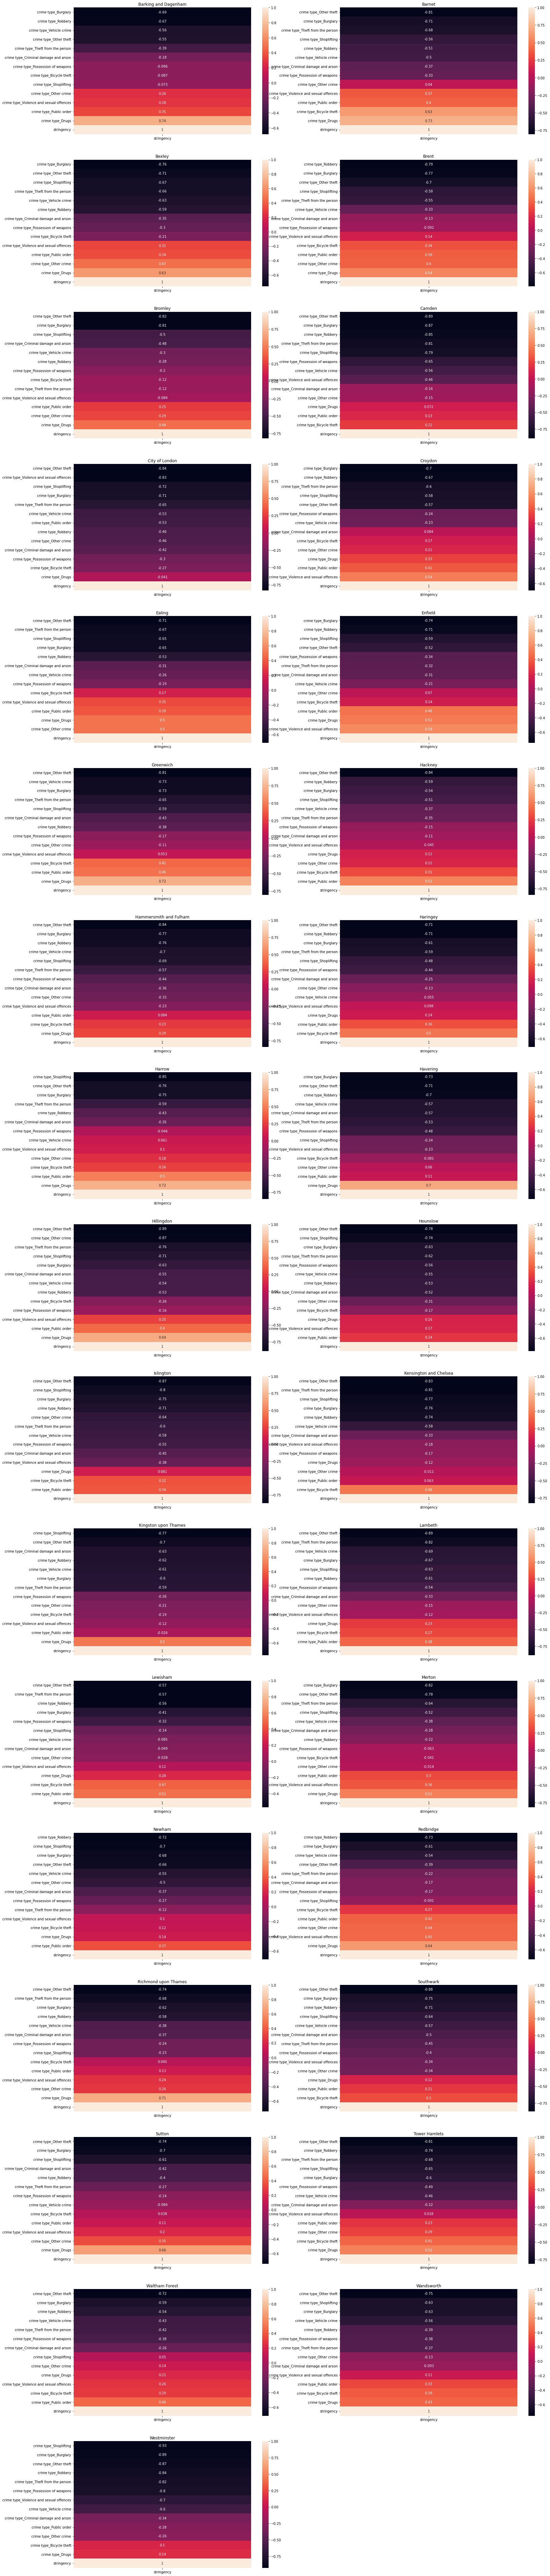

In [ ]:
#Correlation between crime types and stringency by London borough

fig, axes = plt.subplots(nrows=17, ncols=2, figsize=(26, 140))  # define the figure and subplots
axes = axes.ravel()  # array to 1D
dfg =   boroughs_stringe
index = list(range(33))


for index,  group, data, ax in zip(index, boroughs, dfg, axes):
  
  
  sns.heatmap(data, annot = True, ax = ax)
  ax.set_title(group)
fig.delaxes(axes[33])

  